In [22]:
import json
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set up path to data - Updated to CSV file
DATA_PATH = Path(r"C:\laragon\www\Datathon-Jatim-2025\data\dapo-kemdikdasmen\2025-1\Prov. Jawa Timur\ALL\jatim-csv.csv")
print(f"Data path: {DATA_PATH}")
print(f"Data path exists: {DATA_PATH.exists()}")

# Load data directly from CSV
print("Loading facility data from CSV...")
try:
    df = pd.read_csv(DATA_PATH)
    print(f"Data loaded successfully!")
    print(f"DataFrame shape: {df.shape}")
    print("\nColumn names:")
    print(df.columns.tolist())
    print("\nFirst few rows:")
    print(df.head())
except Exception as e:
    print(f"Error loading CSV file: {e}")

Data path: C:\laragon\www\Datathon-Jatim-2025\data\dapo-kemdikdasmen\2025-1\Prov. Jawa Timur\ALL\jatim-csv.csv
Data path exists: True
Loading facility data from CSV...
Data loaded successfully!
DataFrame shape: (392, 103)

Column names:
['kabupaten/kota', 'kecamatan', 'sekolah', 'rombel', 'sekolah_id', 'npsn', 'bentuk_pendidikan', 'status_sekolah', 'akreditasi', 'guru_kelas', 'guru_matematika', 'guru_bahasa_indonesia', 'guru_bahasa_inggris', 'guru_sejarah_indonesia', 'guru_pkn', 'guru_penjaskes', 'guru_agama_budi_pekerti', 'guru_seni_budaya', 'ptk_laki', 'ptk_perempuan', 'pegawai_laki', 'pegawai_perempuan', 'pd_kelas_1_laki', 'pd_kelas_1_perempuan', 'pd_kelas_2_laki', 'pd_kelas_2_perempuan', 'pd_kelas_3_laki', 'pd_kelas_3_perempuan', 'pd_kelas_4_laki', 'pd_kelas_4_perempuan', 'pd_kelas_5_laki', 'pd_kelas_5_perempuan', 'pd_kelas_6_laki', 'pd_kelas_6_perempuan', 'pd_kelas_7_laki', 'pd_kelas_7_perempuan', 'pd_kelas_8_laki', 'pd_kelas_8_perempuan', 'pd_kelas_9_laki', 'pd_kelas_9_perempuan'

In [23]:
# Remove the old load_all_facility_data function and replace with direct CSV loading

# Load data directly from CSV
print("Loading facility data from CSV...")
try:
    df = pd.read_csv(DATA_PATH)
    print(f"Data loaded successfully!")
    print(f"DataFrame shape: {df.shape}")
    print(f"Total records loaded: {len(df)}")
    
    # Display basic info about the dataset
    print("\nDataset Info:")
    print(f"Columns: {len(df.columns)}")
    print(f"Rows: {len(df)}")
    
    # Show column names to understand the structure
    print("\nAll columns:")
    for i, col in enumerate(df.columns):
        print(f"{i+1:2d}. {col}")
        
    # Check for missing values
    print(f"\nMissing values per column:")
    missing_counts = df.isnull().sum()
    for col, count in missing_counts.items():
        if count > 0:
            print(f"{col}: {count} ({count/len(df)*100:.1f}%)")
    
except Exception as e:
    print(f"Error loading CSV file: {e}")
    print("Please check if the file path is correct and the file exists.")

Loading facility data from CSV...
Data loaded successfully!
DataFrame shape: (392, 103)
Total records loaded: 392

Dataset Info:
Columns: 103
Rows: 392

All columns:
 1. kabupaten/kota
 2. kecamatan
 3. sekolah
 4. rombel
 5. sekolah_id
 6. npsn
 7. bentuk_pendidikan
 8. status_sekolah
 9. akreditasi
10. guru_kelas
11. guru_matematika
12. guru_bahasa_indonesia
13. guru_bahasa_inggris
14. guru_sejarah_indonesia
15. guru_pkn
16. guru_penjaskes
17. guru_agama_budi_pekerti
18. guru_seni_budaya
19. ptk_laki
20. ptk_perempuan
21. pegawai_laki
22. pegawai_perempuan
23. pd_kelas_1_laki
24. pd_kelas_1_perempuan
25. pd_kelas_2_laki
26. pd_kelas_2_perempuan
27. pd_kelas_3_laki
28. pd_kelas_3_perempuan
29. pd_kelas_4_laki
30. pd_kelas_4_perempuan
31. pd_kelas_5_laki
32. pd_kelas_5_perempuan
33. pd_kelas_6_laki
34. pd_kelas_6_perempuan
35. pd_kelas_7_laki
36. pd_kelas_7_perempuan
37. pd_kelas_8_laki
38. pd_kelas_8_perempuan
39. pd_kelas_9_laki
40. pd_kelas_9_perempuan
41. pd_kelas_10_laki
42. pd_ke

# Analisis Persentase Fasilitas Sekolah - Jawa Timur

## Metode Perhitungan yang Digunakan:

### **PERUBAHAN METODE: BEFORE + AFTER**
Kode ini telah dimodifikasi untuk menggunakan **penjumlahan nilai BEFORE dan AFTER** untuk setiap jenis fasilitas, bukan hanya nilai AFTER saja.

### **Formula Perhitungan:**
1. **Total Fasilitas per Sekolah:** `Total = Before + After`
2. **Persentase per Fasilitas:** `(Total_Sekolah / Max_Total_Semua_Sekolah) × 100%`  
3. **Overall Score:** `Rata-rata dari semua persentase fasilitas`

### **Contoh Perhitungan:**
```
Sekolah A:
- Before ruang_kelas: 8, After ruang_kelas: 4 → Total: 12
- Max ruang_kelas di semua sekolah: 15
- Persentase: (12/15) × 100% = 80%
```

### **Keuntungan Metode Ini:**
- Menghitung **total kapasitas fasilitas** (existing + tambahan)
- Memberikan gambaran **kondisi fasilitas saat ini** secara menyeluruh
- Lebih akurat untuk menilai **kelengkapan infrastruktur** sekolah

In [24]:
def calculate_facility_percentages(df):
    """
    Calculate facility percentages based on 'before + after' values
    Logic: (current_count / max_count) * 100% per criteria
    """
    
    # Define facility types (without before/after prefix)
    facility_types = [
        'ruang_kelas',
        'ruang_perpus', 
        'ruang_lab',
        'ruang_praktik',
        'ruang_pimpinan',
        'ruang_guru',
        'ruang_ibadah',
        'ruang_uks',
        'toilet',
        'gudang',
        'ruang_sirkulasi',
        'tempat_bermain_olahraga',
        'ruang_tu',
        'ruang_konseling',
        'ruang_osis',
        'bangunan'
    ]
    
    # Calculate statistics for each facility
    facility_stats = {}
    
    for facility_type in facility_types:
        before_col = f'before_{facility_type}'
        after_col = f'after_{facility_type}'
        
        if before_col in df.columns and after_col in df.columns:
            # Calculate total facilities (before + after)
            df[f'total_{facility_type}'] = df[before_col].fillna(0) + df[after_col].fillna(0)
            
            # Get current counts (filter out null values)
            current_counts = df[f'total_{facility_type}'].dropna()
            
            # Calculate statistics
            max_count = current_counts.max() if len(current_counts) > 0 else 0
            min_count = current_counts.min() if len(current_counts) > 0 else 0
            mean_count = current_counts.mean() if len(current_counts) > 0 else 0
            total_facilities = current_counts.sum() if len(current_counts) > 0 else 0
            total_schools = len(current_counts)
            
            # Calculate percentage based on max value
            if max_count > 0:
                percentages = (current_counts / max_count) * 100
                avg_percentage = percentages.mean()
            else:
                avg_percentage = 0
            
            facility_stats[f'total_{facility_type}'] = {
                'facility_name': facility_type.replace('_', ' ').title(),
                'total_facilities': total_facilities,
                'total_schools': total_schools,
                'max_count': max_count,
                'min_count': min_count,
                'mean_count': mean_count,
                'avg_percentage_vs_max': avg_percentage,
                'schools_with_facility': len(current_counts[current_counts > 0]),
                'schools_without_facility': len(current_counts[current_counts == 0])
            }
    
    return facility_stats

# Calculate facility percentages using the loaded CSV data
print("Calculating facility percentages (BEFORE + AFTER)...")
facility_percentages = calculate_facility_percentages(df)

# Display results
print("\n" + "="*80)
print("FACILITY PERCENTAGE ANALYSIS (BEFORE + AFTER VALUES)")
print("="*80)

for facility, stats in facility_percentages.items():
    print(f"\n{stats['facility_name']}:")
    print(f"  Total facilities across all schools: {stats['total_facilities']}")
    print(f"  Total schools analyzed: {stats['total_schools']}")
    print(f"  Maximum facilities in a single school: {stats['max_count']}")
    print(f"  Average facilities per school: {stats['mean_count']:.2f}")
    print(f"  Average percentage vs maximum: {stats['avg_percentage_vs_max']:.2f}%")
    print(f"  Schools with this facility: {stats['schools_with_facility']}")
    print(f"  Schools without this facility: {stats['schools_without_facility']}")
    print(f"  Facility availability rate: {(stats['schools_with_facility']/stats['total_schools']*100):.2f}%")

Calculating facility percentages (BEFORE + AFTER)...

FACILITY PERCENTAGE ANALYSIS (BEFORE + AFTER VALUES)

Ruang Kelas:
  Total facilities across all schools: 7001
  Total schools analyzed: 392
  Maximum facilities in a single school: 119
  Average facilities per school: 17.86
  Average percentage vs maximum: 15.01%
  Schools with this facility: 391
  Schools without this facility: 1
  Facility availability rate: 99.74%

Ruang Perpus:
  Total facilities across all schools: 534
  Total schools analyzed: 392
  Maximum facilities in a single school: 6
  Average facilities per school: 1.36
  Average percentage vs maximum: 22.70%
  Schools with this facility: 268
  Schools without this facility: 124
  Facility availability rate: 68.37%

Ruang Lab:
  Total facilities across all schools: 197
  Total schools analyzed: 392
  Maximum facilities in a single school: 6
  Average facilities per school: 0.50
  Average percentage vs maximum: 8.38%
  Schools with this facility: 97
  Schools without th

In [25]:
def calculate_detailed_percentages(df):
    """
    Calculate detailed percentages for each school and facility
    Logic: (current_facility_count / max_facility_count_across_all_schools) * 100%
    Using BEFORE + AFTER values combined
    """
    
    # Define facility types (without before/after prefix)
    facility_types = [
        'ruang_kelas', 'ruang_perpus', 'ruang_lab',
        'ruang_praktik', 'ruang_pimpinan', 'ruang_guru',
        'ruang_ibadah', 'ruang_uks', 'toilet',
        'gudang', 'ruang_sirkulasi', 'tempat_bermain_olahraga',
        'ruang_tu', 'ruang_konseling', 'ruang_osis', 'bangunan'
    ]
    
    # Create a copy of the dataframe for calculations
    df_calc = df.copy()
    
    # Calculate total facilities (before + after) and percentage for each facility type
    for facility_type in facility_types:
        before_col = f'before_{facility_type}'
        after_col = f'after_{facility_type}'
        total_col = f'total_{facility_type}'
        
        if before_col in df_calc.columns and after_col in df_calc.columns:
            # Calculate total facilities (before + after)
            df_calc[total_col] = df_calc[before_col].fillna(0) + df_calc[after_col].fillna(0)
            
            # Get max value across all schools (excluding null values)
            max_value = df_calc[total_col].max()
            
            if max_value > 0:
                # Calculate percentage: (total_count / max_count) * 100
                df_calc[f'{total_col}_percentage'] = (df_calc[total_col] / max_value) * 100
            else:
                df_calc[f'{total_col}_percentage'] = 0
            
            # Fill null values with 0
            df_calc[f'{total_col}_percentage'] = df_calc[f'{total_col}_percentage'].fillna(0)
    
    return df_calc

# Calculate detailed percentages using the CSV data
df_with_percentages = calculate_detailed_percentages(df)

# Show sample calculations for verification
print("SAMPLE PERCENTAGE CALCULATIONS (BEFORE + AFTER)")
print("="*80)
print("Showing first 5 schools with their facility counts and percentages:")
print()

# Check if required columns exist for school identification
id_columns = []
if 'sekolah' in df_with_percentages.columns:
    id_columns.append('sekolah')
if 'kabupaten' in df_with_percentages.columns:
    id_columns.append('kabupaten')
if 'kecamatan' in df_with_percentages.columns:
    id_columns.append('kecamatan')

if id_columns:
    sample_schools = df_with_percentages[id_columns].head()

    for idx in sample_schools.index[:5]:
        if 'sekolah' in df_with_percentages.columns:
            school_name = df_with_percentages.loc[idx, 'sekolah']
            print(f"\nSekolah: {school_name}")
        
        if 'kabupaten' in df_with_percentages.columns and 'kecamatan' in df_with_percentages.columns:
            kabupaten = df_with_percentages.loc[idx, 'kabupaten']
            kecamatan = df_with_percentages.loc[idx, 'kecamatan']
            print(f"Lokasi: {kecamatan}, {kabupaten}")
        
        print("-" * 60)
        
        # Show facility counts and percentages
        facility_types = [
            'ruang_kelas', 'ruang_perpus', 'ruang_lab',
            'ruang_praktik', 'ruang_pimpinan', 'ruang_guru'
        ]
        
        for facility_type in facility_types:
            before_col = f'before_{facility_type}'
            after_col = f'after_{facility_type}'
            total_col = f'total_{facility_type}'
            
            if all(col in df_with_percentages.columns for col in [before_col, after_col, total_col]):
                before_count = df_with_percentages.loc[idx, before_col] or 0
                after_count = df_with_percentages.loc[idx, after_col] or 0
                total_count = df_with_percentages.loc[idx, total_col]
                percentage = df_with_percentages.loc[idx, f'{total_col}_percentage']
                max_val = df_with_percentages[total_col].max()
                
                facility_name = facility_type.replace('_', ' ').title()
                print(f"{facility_name:20}: {before_count:2.0f} + {after_count:2.0f} = {total_count:3.0f} / {max_val:3.0f} = {percentage:6.2f}%")

print(f"\n\nTotal schools analyzed: {len(df_with_percentages)}")
print(f"Facilities calculated: {len([col for col in df_with_percentages.columns if col.endswith('_percentage')])}")

SAMPLE PERCENTAGE CALCULATIONS (BEFORE + AFTER)
Showing first 5 schools with their facility counts and percentages:


Sekolah: SLB SAMUDRA LAVENDER
------------------------------------------------------------
Ruang Kelas         :  8 +  0 =   8 / 119 =   6.72%
Ruang Perpus        :  1 +  0 =   1 /   6 =  16.67%
Ruang Lab           :  0 +  0 =   0 /   6 =   0.00%
Ruang Praktik       :  0 +  0 =   0 /  18 =   0.00%
Ruang Pimpinan      :  1 +  0 =   1 /   6 =  16.67%
Ruang Guru          :  1 +  0 =   1 /   6 =  16.67%

Sekolah: SLB PGRI
------------------------------------------------------------
Ruang Kelas         :  7 +  7 =  14 / 119 =  11.76%
Ruang Perpus        :  1 +  1 =   2 /   6 =  33.33%
Ruang Lab           :  0 +  0 =   0 /   6 =   0.00%
Ruang Praktik       :  0 +  0 =   0 /  18 =   0.00%
Ruang Pimpinan      :  1 +  1 =   2 /   6 =  33.33%
Ruang Guru          :  1 +  1 =   2 /   6 =  33.33%

Sekolah: SLB NEGERI KELEYAN BANGKALAN
------------------------------------------------

In [32]:
def calculate_overall_facility_score(df):
    """
    Calculate overall facility score for each school
    Average of all facility percentages (BEFORE + AFTER)
    """
    # Get columns that end with '_percentage' and contain 'total_'
    percentage_columns = [col for col in df.columns if col.endswith('_percentage') and 'total_' in col]
    
    if percentage_columns:
        # Calculate overall score as average of all facility percentages
        df['overall_facility_score'] = df[percentage_columns].mean(axis=1)
    else:
        # If no percentage columns found, set score to 0
        df['overall_facility_score'] = 0
    
    return df

# Calculate overall scores
df_with_scores = calculate_overall_facility_score(df_with_percentages)

# Create comprehensive school ranking
print("DAFTAR SEMUA SEKOLAH DENGAN PERSENTASE FASILITAS (BEFORE + AFTER)")
print("="*120)
print("Diurutkan dari persentase fasilitas tertinggi ke terendah")
print("="*120)

# Select relevant columns for display based on what's available
available_columns = ['overall_facility_score']

# Add school identification columns if available
if 'sekolah' in df_with_scores.columns:
    available_columns.insert(0, 'sekolah')

# Add facility percentage columns if available
facility_columns = [
    'total_ruang_kelas_percentage', 'total_ruang_perpus_percentage', 
    'total_ruang_lab_percentage', 'total_ruang_praktik_percentage',
    'total_ruang_pimpinan_percentage', 'total_ruang_guru_percentage',
    'total_ruang_ibadah_percentage', 'total_ruang_uks_percentage',
    'total_toilet_percentage', 'total_gudang_percentage'
]

for col in facility_columns:
    if col in df_with_scores.columns:
        available_columns.append(col)

school_ranking = df_with_scores[available_columns].copy()

# Sort by overall facility score (highest first)
school_ranking = school_ranking.sort_values('overall_facility_score', ascending=False)

# Display results with ranking
print(f"\nTotal sekolah dianalisis: {len(school_ranking)}")
print(f"Rata-rata skor fasilitas keseluruhan: {school_ranking['overall_facility_score'].mean():.2f}%")
print(f"Skor tertinggi: {school_ranking['overall_facility_score'].max():.2f}%")
print(f"Skor terendah: {school_ranking['overall_facility_score'].min():.2f}%")

# Display top schools (adjust based on available columns)
print("\n" + "-"*120)
if 'sekolah' in available_columns:
    print(f"{'Rank':<5} {'Sekolah':<50} {'Overall':<8} {'Details'}")
    print("-"*120)

    for idx, (_, row) in enumerate(school_ranking.head(20).iterrows(), 1):
        sekolah = str(row.get('sekolah', f'School_{idx}'))[:47] + "..." if len(str(row.get('sekolah', f'School_{idx}'))) > 50 else str(row.get('sekolah', f'School_{idx}'))
        
        # Show some facility percentages if available
        details = ""
        for col in ['total_ruang_kelas_percentage', 'total_ruang_perpus_percentage', 'total_ruang_lab_percentage']:
            if col in available_columns:
                details += f" {row[col]:4.1f}%"
        
        print(f"{idx:<5} {sekolah:<50} {row['overall_facility_score']:>6.1f}% {details}")

print(f"\n... (menampilkan 20 teratas dari {len(school_ranking)} sekolah)")

# Score distribution summary
print(f"\n{'='*120}")
print("RINGKASAN DISTRIBUSI SKOR")
print("="*120)

score_ranges = [
    (90, 100, "Sangat Baik (90-100%)"),
    (75, 89, "Baik (75-89%)"),
    (50, 74, "Cukup (50-74%)"),
    (25, 49, "Kurang (25-49%)"),
    (0, 24, "Sangat Kurang (0-24%)")
]

for min_score, max_score, category in score_ranges:
    count = len(school_ranking[
        (school_ranking['overall_facility_score'] >= min_score) & 
        (school_ranking['overall_facility_score'] <= max_score)
    ])
    percentage = (count / len(school_ranking)) * 100 if len(school_ranking) > 0 else 0
    print(f"{category:<25}: {count:>4} sekolah ({percentage:>5.1f}%)")

print(f"\nTotal: {len(school_ranking)} sekolah")

DAFTAR SEMUA SEKOLAH DENGAN PERSENTASE FASILITAS (BEFORE + AFTER)
Diurutkan dari persentase fasilitas tertinggi ke terendah

Total sekolah dianalisis: 392
Rata-rata skor fasilitas keseluruhan: 14.12%
Skor tertinggi: 53.58%
Skor terendah: 0.00%

------------------------------------------------------------------------------------------------------------------------
Rank  Sekolah                                            Overall  Details
------------------------------------------------------------------------------------------------------------------------
1     SLB BHAKTI LUHUR                                     53.6%  58.8% 33.3% 33.3%
2     SLBN PEMBINA TINGKAT NASIONAL BAGIAN C MALANG        50.9%  52.1% 33.3% 66.7%
3     SLB TUNAS HARAPAN I TEMBELANG                        49.3%  13.4% 33.3% 100.0%
4     SLB NEGERI 2 KOTA PASURUAN                           48.3%  30.3% 100.0% 33.3%
5     SLB NEGERI GEDANGAN                                  40.8%  53.8% 33.3% 66.7%
6     SLB NEGERI 

In [33]:
def calculate_overall_facility_score(df):
    """
    Calculate overall facility score for each school
    Average of all facility percentages (BEFORE + AFTER)
    """
    # Get columns that end with '_percentage' and contain 'total_'
    percentage_columns = [col for col in df.columns if col.endswith('_percentage') and 'total_' in col]
    
    if percentage_columns:
        # Calculate overall score as average of all facility percentages
        df['overall_facility_score'] = df[percentage_columns].mean(axis=1)
    else:
        # If no percentage columns found, set score to 0
        df['overall_facility_score'] = 0
    
    return df

# Calculate overall scores
df_with_scores = calculate_overall_facility_score(df_with_percentages)

# Check for status column to separate public and private schools
status_column = None
for col in df_with_scores.columns:
    if 'status' in col.lower() or 'negeri' in col.lower() or 'swasta' in col.lower():
        status_column = col
        break

# If status column exists, separate the data
if status_column:
    print(f"Found status column: {status_column}")
    print(f"Unique values in status column: {df_with_scores[status_column].unique()}")
    
    # Separate schools by status
    df_negeri = df_with_scores[df_with_scores[status_column].str.contains('Negeri|negeri|NEGERI', na=False)].copy()
    df_swasta = df_with_scores[df_with_scores[status_column].str.contains('Swasta|swasta|SWASTA', na=False)].copy()
    
    print(f"\nSekolah Negeri: {len(df_negeri)} sekolah")
    print(f"Sekolah Swasta: {len(df_swasta)} sekolah")
    print(f"Total: {len(df_negeri) + len(df_swasta)} sekolah")
else:
    # If no status column, try to infer from school name
    print("No status column found. Trying to infer from school names...")
    df_negeri = df_with_scores[df_with_scores['sekolah'].str.contains('Negeri|SDN|SMPN|SMAN|SMK N', na=False)].copy()
    df_swasta = df_with_scores[~df_with_scores['sekolah'].str.contains('Negeri|SDN|SMPN|SMAN|SMK N', na=False)].copy()
    
    print(f"\nSekolah Negeri (berdasarkan nama): {len(df_negeri)} sekolah")
    print(f"Sekolah Swasta (berdasarkan nama): {len(df_swasta)} sekolah")

# Function to display ranking for a specific dataset
def display_school_ranking(df_data, title, show_count=20):
    """Display school ranking for a specific dataset"""
    
    # Select relevant columns for display based on what's available
    available_columns = ['overall_facility_score']
    
    # Add school identification columns if available
    if 'sekolah' in df_data.columns:
        available_columns.insert(0, 'sekolah')
    
    # Add facility percentage columns if available
    facility_columns = [
        'total_ruang_kelas_percentage', 'total_ruang_perpus_percentage', 
        'total_ruang_lab_percentage', 'total_ruang_praktik_percentage',
        'total_ruang_pimpinan_percentage', 'total_ruang_guru_percentage',
        'total_ruang_ibadah_percentage', 'total_ruang_uks_percentage',
        'total_toilet_percentage', 'total_gudang_percentage'
    ]
    
    for col in facility_columns:
        if col in df_data.columns:
            available_columns.append(col)
    
    school_ranking = df_data[available_columns].copy()
    
    # Sort by overall facility score (highest first)
    school_ranking = school_ranking.sort_values('overall_facility_score', ascending=False)
    
    print(f"\n{'='*120}")
    print(f"DAFTAR {title.upper()} - PERSENTASE FASILITAS (BEFORE + AFTER)")
    print("="*120)
    print("Diurutkan dari persentase fasilitas tertinggi ke terendah")
    print("="*120)
    
    # Display statistics
    print(f"\nTotal sekolah dianalisis: {len(school_ranking)}")
    if len(school_ranking) > 0:
        print(f"Rata-rata skor fasilitas keseluruhan: {school_ranking['overall_facility_score'].mean():.2f}%")
        print(f"Skor tertinggi: {school_ranking['overall_facility_score'].max():.2f}%")
        print(f"Skor terendah: {school_ranking['overall_facility_score'].min():.2f}%")
    
    # Display top schools
    if len(school_ranking) > 0 and 'sekolah' in available_columns:
        print("\n" + "-"*120)
        print(f"{'Rank':<5} {'Sekolah':<50} {'Overall':<8} {'Details'}")
        print("-"*120)
        
        for idx, (_, row) in enumerate(school_ranking.head(show_count).iterrows(), 1):
            sekolah = str(row.get('sekolah', f'School_{idx}'))[:47] + "..." if len(str(row.get('sekolah', f'School_{idx}'))) > 50 else str(row.get('sekolah', f'School_{idx}'))
            
            # Show some facility percentages if available
            details = ""
            for col in ['total_ruang_kelas_percentage', 'total_ruang_perpus_percentage', 'total_ruang_lab_percentage']:
                if col in available_columns:
                    details += f" {row[col]:4.1f}%"
            
            print(f"{idx:<5} {sekolah:<50} {row['overall_facility_score']:>6.1f}% {details}")
        
        print(f"\n... (menampilkan {min(show_count, len(school_ranking))} teratas dari {len(school_ranking)} sekolah)")
    
    # Score distribution summary
    if len(school_ranking) > 0:
        print(f"\n{'='*80}")
        print(f"RINGKASAN DISTRIBUSI SKOR - {title.upper()}")
        print("="*80)
        
        score_ranges = [
            (90, 100, "Sangat Baik (90-100%)"),
            (75, 89, "Baik (75-89%)"),
            (50, 74, "Cukup (50-74%)"),
            (25, 49, "Kurang (25-49%)"),
            (0, 24, "Sangat Kurang (0-24%)")
        ]
        
        for min_score, max_score, category in score_ranges:
            count = len(school_ranking[
                (school_ranking['overall_facility_score'] >= min_score) & 
                (school_ranking['overall_facility_score'] <= max_score)
            ])
            percentage = (count / len(school_ranking)) * 100 if len(school_ranking) > 0 else 0
            print(f"{category:<25}: {count:>4} sekolah ({percentage:>5.1f}%)")
        
        print(f"\nTotal: {len(school_ranking)} sekolah")

# Display rankings for both types
if len(df_negeri) > 0:
    display_school_ranking(df_negeri, "Sekolah Negeri", 20)

if len(df_swasta) > 0:
    display_school_ranking(df_swasta, "Sekolah Swasta", 20)

# Overall comparison summary
print(f"\n{'='*120}")
print("PERBANDINGAN SEKOLAH NEGERI VS SWASTA")
print("="*120)

if len(df_negeri) > 0 and len(df_swasta) > 0:
    negeri_avg = df_negeri['overall_facility_score'].mean()
    swasta_avg = df_swasta['overall_facility_score'].mean()
    
    print(f"Rata-rata Skor Fasilitas:")
    print(f"  Sekolah Negeri  : {negeri_avg:.2f}%")
    print(f"  Sekolah Swasta  : {swasta_avg:.2f}%")
    print(f"  Selisih         : {abs(negeri_avg - swasta_avg):.2f}%")
    
    if negeri_avg > swasta_avg:
        print(f"  Sekolah Negeri memiliki skor fasilitas {negeri_avg - swasta_avg:.2f}% lebih tinggi")
    elif swasta_avg > negeri_avg:
        print(f"  Sekolah Swasta memiliki skor fasilitas {swasta_avg - negeri_avg:.2f}% lebih tinggi")
    else:
        print(f"  Skor fasilitas Negeri dan Swasta sama")
    
    print(f"\nJumlah Sekolah:")
    print(f"  Sekolah Negeri  : {len(df_negeri)} sekolah")
    print(f"  Sekolah Swasta  : {len(df_swasta)} sekolah")
    print(f"  Total Sekolah   : {len(df_negeri) + len(df_swasta)} sekolah")

Found status column: status_sekolah
Unique values in status column: ['Swasta' 'Negeri']

Sekolah Negeri: 95 sekolah
Sekolah Swasta: 297 sekolah
Total: 392 sekolah

DAFTAR SEKOLAH NEGERI - PERSENTASE FASILITAS (BEFORE + AFTER)
Diurutkan dari persentase fasilitas tertinggi ke terendah

Total sekolah dianalisis: 95
Rata-rata skor fasilitas keseluruhan: 16.84%
Skor tertinggi: 50.93%
Skor terendah: 0.67%

------------------------------------------------------------------------------------------------------------------------
Rank  Sekolah                                            Overall  Details
------------------------------------------------------------------------------------------------------------------------
1     SLBN PEMBINA TINGKAT NASIONAL BAGIAN C MALANG        50.9%  52.1% 33.3% 66.7%
2     SLB NEGERI 2 KOTA PASURUAN                           48.3%  30.3% 100.0% 33.3%
3     SLB NEGERI GEDANGAN                                  40.8%  53.8% 33.3% 66.7%
4     SLB NEGERI 1 KOTA PAS

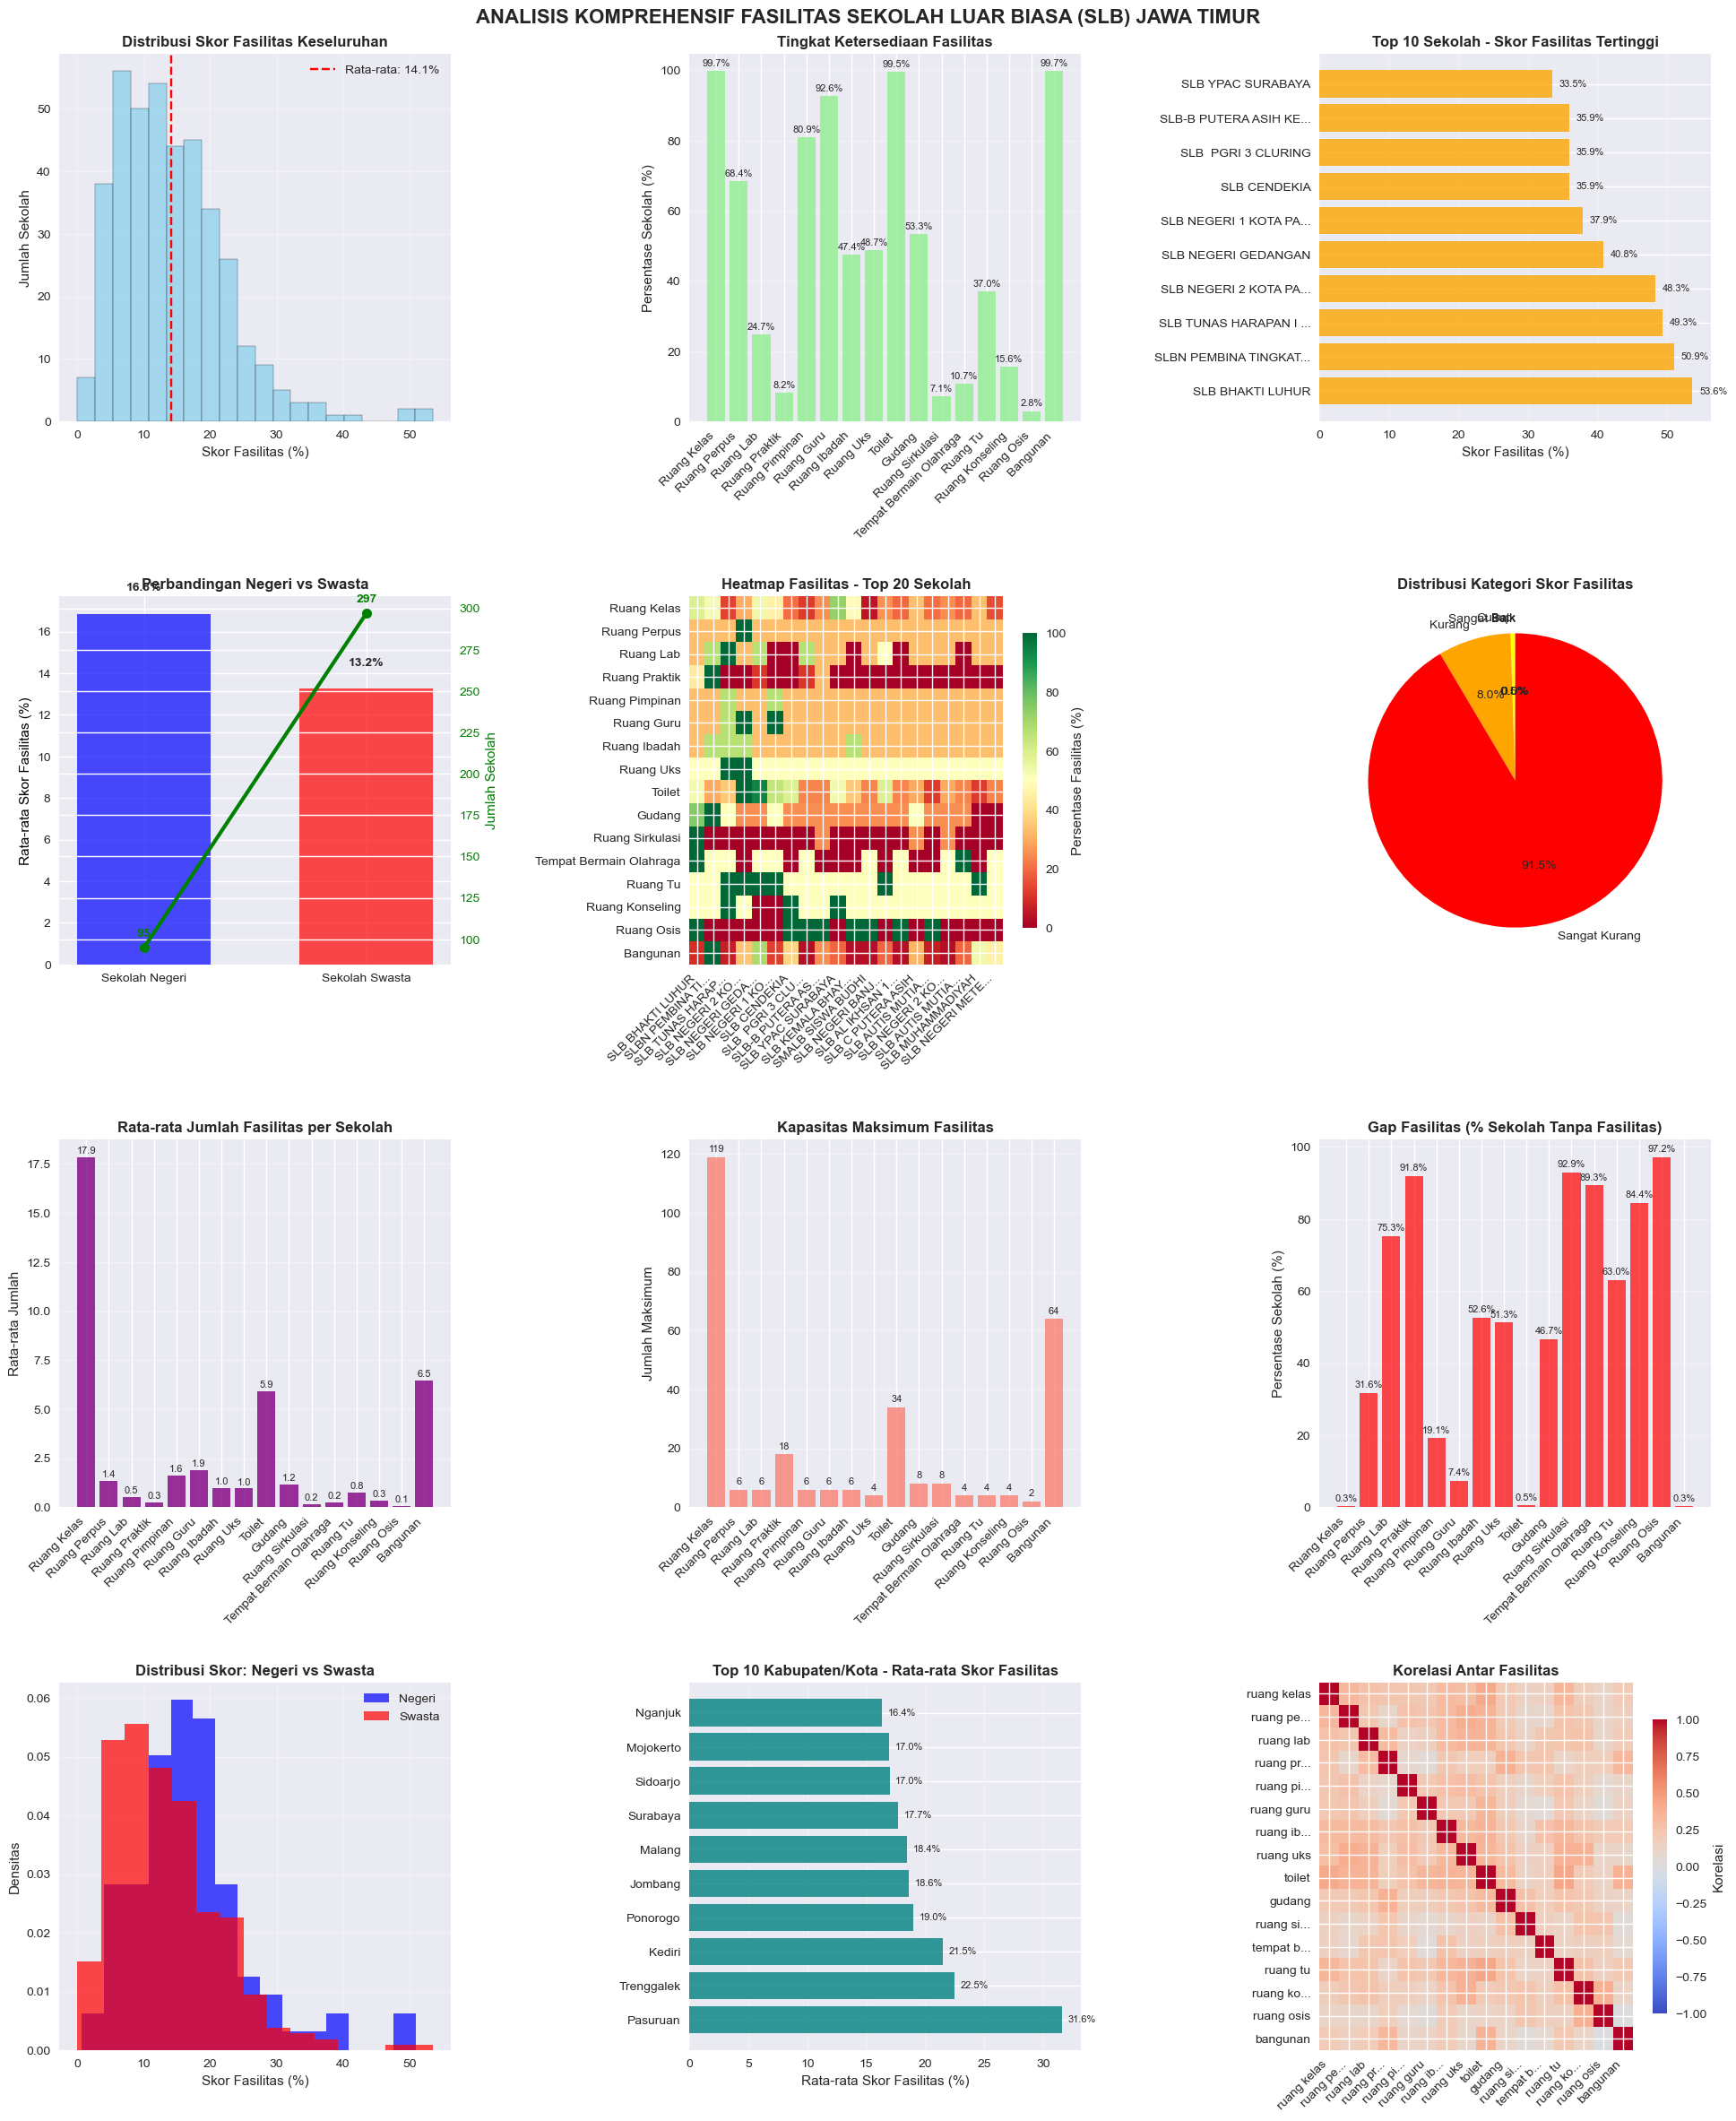


VISUALISASI BERHASIL DIBUAT!
✅ comprehensive_facility_analysis.png - Visualisasi lengkap dalam format PNG
✅ interactive_facility_dashboard.html - Dashboard interaktif

Visualisasi mencakup:
📊 Distribusi skor fasilitas
📈 Perbandingan Negeri vs Swasta
🗺️ Analisis regional
🏗️ Ketersediaan dan gap fasilitas
🔗 Korelasi antar fasilitas
🏆 Ranking sekolah terbaik


In [37]:
# Create comprehensive visualizations for the facility analysis
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.patches import Rectangle
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Set style for better visualization
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

def create_comprehensive_facility_visualizations(df_with_scores, facility_percentages, df_negeri, df_swasta):
    """Create comprehensive visualizations for facility analysis"""
    
    # Create figure with multiple subplots
    fig = plt.figure(figsize=(20, 24))
    
    # 1. Overall Facility Score Distribution
    ax1 = plt.subplot(4, 3, 1)
    plt.hist(df_with_scores['overall_facility_score'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    plt.title('Distribusi Skor Fasilitas Keseluruhan', fontsize=12, fontweight='bold')
    plt.xlabel('Skor Fasilitas (%)')
    plt.ylabel('Jumlah Sekolah')
    plt.grid(alpha=0.3)
    
    # Add statistics text
    mean_score = df_with_scores['overall_facility_score'].mean()
    plt.axvline(mean_score, color='red', linestyle='--', label=f'Rata-rata: {mean_score:.1f}%')
    plt.legend()
    
    # 2. Facility Availability Rate
    ax2 = plt.subplot(4, 3, 2)
    facility_names = [stats['facility_name'] for stats in facility_percentages.values()]
    availability_rates = [(stats['schools_with_facility']/stats['total_schools']*100) 
                         for stats in facility_percentages.values()]
    
    bars = plt.bar(range(len(facility_names)), availability_rates, color='lightgreen', alpha=0.8)
    plt.title('Tingkat Ketersediaan Fasilitas', fontsize=12, fontweight='bold')
    plt.ylabel('Persentase Sekolah (%)')
    plt.xticks(range(len(facility_names)), facility_names, rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)
    
    # Add value labels
    for i, bar in enumerate(bars):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{height:.1f}%', ha='center', va='bottom', fontsize=8)
    
    # 3. Top 10 Schools by Facility Score
    ax3 = plt.subplot(4, 3, 3)
    top_schools = df_with_scores.nlargest(10, 'overall_facility_score')
    school_names = [name[:20] + "..." if len(name) > 23 else name 
                   for name in top_schools['sekolah'].values]
    
    bars = plt.barh(range(len(school_names)), top_schools['overall_facility_score'], 
                   color='orange', alpha=0.8)
    plt.title('Top 10 Sekolah - Skor Fasilitas Tertinggi', fontsize=12, fontweight='bold')
    plt.xlabel('Skor Fasilitas (%)')
    plt.yticks(range(len(school_names)), school_names)
    plt.grid(axis='x', alpha=0.3)
    
    # Add value labels
    for i, bar in enumerate(bars):
        width = bar.get_width()
        plt.text(width + 1, bar.get_y() + bar.get_height()/2.,
                f'{width:.1f}%', ha='left', va='center', fontsize=8)
    
    # 4. Negeri vs Swasta Comparison
    ax4 = plt.subplot(4, 3, 4)
    if len(df_negeri) > 0 and len(df_swasta) > 0:
        categories = ['Sekolah Negeri', 'Sekolah Swasta']
        scores = [df_negeri['overall_facility_score'].mean(), 
                 df_swasta['overall_facility_score'].mean()]
        counts = [len(df_negeri), len(df_swasta)]
        
        # Create twin axis
        ax4_twin = ax4.twinx()
        
        # Bar plot for scores
        bars1 = ax4.bar(categories, scores, color=['blue', 'red'], alpha=0.7, width=0.6)
        ax4.set_ylabel('Rata-rata Skor Fasilitas (%)', color='black')
        ax4.set_title('Perbandingan Negeri vs Swasta', fontsize=12, fontweight='bold')
        
        # Line plot for counts
        ax4_twin.plot(categories, counts, color='green', marker='o', linewidth=3, markersize=8)
        ax4_twin.set_ylabel('Jumlah Sekolah', color='green')
        ax4_twin.tick_params(axis='y', labelcolor='green')
        
        # Add value labels
        for i, (bar, score, count) in enumerate(zip(bars1, scores, counts)):
            ax4.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 1,
                    f'{score:.1f}%', ha='center', va='bottom', fontweight='bold')
            ax4_twin.text(i, count + 5, f'{count}', ha='center', va='bottom', 
                         color='green', fontweight='bold')
    
    # 5. Facility Distribution Heatmap
    ax5 = plt.subplot(4, 3, 5)
    
    # Create matrix for heatmap
    facility_cols = [col for col in df_with_scores.columns if col.endswith('_percentage') and 'total_' in col]
    if len(facility_cols) > 0:
        # Sample 20 schools for readability
        sample_schools = df_with_scores.nlargest(20, 'overall_facility_score')
        heatmap_data = sample_schools[facility_cols].T
        
        # Clean column names for display
        clean_names = [col.replace('total_', '').replace('_percentage', '').replace('_', ' ').title() 
                      for col in facility_cols]
        school_names_short = [name[:15] + "..." if len(name) > 18 else name 
                             for name in sample_schools['sekolah'].values]
        
        # Create heatmap
        im = plt.imshow(heatmap_data, cmap='RdYlGn', aspect='auto', vmin=0, vmax=100)
        plt.title('Heatmap Fasilitas - Top 20 Sekolah', fontsize=12, fontweight='bold')
        plt.yticks(range(len(clean_names)), clean_names)
        plt.xticks(range(len(school_names_short)), school_names_short, rotation=45, ha='right')
        
        # Add colorbar
        cbar = plt.colorbar(im, ax=ax5, shrink=0.8)
        cbar.set_label('Persentase Fasilitas (%)')
    
    # 6. Score Distribution by Category
    ax6 = plt.subplot(4, 3, 6)
    score_ranges = [
        (90, 100, "Sangat Baik"),
        (75, 89, "Baik"),
        (50, 74, "Cukup"),
        (25, 49, "Kurang"),
        (0, 24, "Sangat Kurang")
    ]
    
    categories = []
    counts = []
    colors = ['green', 'lightgreen', 'yellow', 'orange', 'red']
    
    for min_score, max_score, category in score_ranges:
        count = len(df_with_scores[
            (df_with_scores['overall_facility_score'] >= min_score) & 
            (df_with_scores['overall_facility_score'] <= max_score)
        ])
        categories.append(category)
        counts.append(count)
    
    # Create pie chart
    wedges, texts, autotexts = plt.pie(counts, labels=categories, colors=colors, autopct='%1.1f%%', 
                                      startangle=90)
    plt.title('Distribusi Kategori Skor Fasilitas', fontsize=12, fontweight='bold')
    
    # 7. Average Facility Count per School
    ax7 = plt.subplot(4, 3, 7)
    avg_counts = [stats['mean_count'] for stats in facility_percentages.values()]
    
    bars = plt.bar(range(len(facility_names)), avg_counts, color='purple', alpha=0.8)
    plt.title('Rata-rata Jumlah Fasilitas per Sekolah', fontsize=12, fontweight='bold')
    plt.ylabel('Rata-rata Jumlah')
    plt.xticks(range(len(facility_names)), facility_names, rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)
    
    # Add value labels
    for i, bar in enumerate(bars):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                f'{height:.1f}', ha='center', va='bottom', fontsize=8)
    
    # 8. Maximum Facility Capacity
    ax8 = plt.subplot(4, 3, 8)
    max_counts = [stats['max_count'] for stats in facility_percentages.values()]
    
    bars = plt.bar(range(len(facility_names)), max_counts, color='salmon', alpha=0.8)
    plt.title('Kapasitas Maksimum Fasilitas', fontsize=12, fontweight='bold')
    plt.ylabel('Jumlah Maksimum')
    plt.xticks(range(len(facility_names)), facility_names, rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)
    
    # Add value labels
    for i, bar in enumerate(bars):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + max(max_counts)*0.01,
                f'{int(height)}', ha='center', va='bottom', fontsize=8)
    
    # 9. Facility Gap Analysis
    ax9 = plt.subplot(4, 3, 9)
    schools_without = [stats['schools_without_facility'] for stats in facility_percentages.values()]
    total_schools = facility_percentages[list(facility_percentages.keys())[0]]['total_schools']
    
    gap_percentages = [(without/total_schools)*100 for without in schools_without]
    
    bars = plt.bar(range(len(facility_names)), gap_percentages, color='red', alpha=0.7)
    plt.title('Gap Fasilitas (% Sekolah Tanpa Fasilitas)', fontsize=12, fontweight='bold')
    plt.ylabel('Persentase Sekolah (%)')
    plt.xticks(range(len(facility_names)), facility_names, rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)
    
    # Add value labels
    for i, bar in enumerate(bars):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{height:.1f}%', ha='center', va='bottom', fontsize=8)
    
    # 10. Score Distribution Comparison (Negeri vs Swasta)
    ax10 = plt.subplot(4, 3, 10)
    if len(df_negeri) > 0 and len(df_swasta) > 0:
        plt.hist(df_negeri['overall_facility_score'], bins=15, alpha=0.7, 
                label='Negeri', color='blue', density=True)
        plt.hist(df_swasta['overall_facility_score'], bins=15, alpha=0.7, 
                label='Swasta', color='red', density=True)
        plt.title('Distribusi Skor: Negeri vs Swasta', fontsize=12, fontweight='bold')
        plt.xlabel('Skor Fasilitas (%)')
        plt.ylabel('Densitas')
        plt.legend()
        plt.grid(alpha=0.3)
    
    # 11. Regional Analysis (by Kabupaten/Kota)
    ax11 = plt.subplot(4, 3, 11)
    if 'kabupaten/kota' in df_with_scores.columns:
        regional_avg = df_with_scores.groupby('kabupaten/kota')['overall_facility_score'].mean().sort_values(ascending=False)
        
        # Show top 10 regions
        top_regions = regional_avg.head(10)
        region_names = [name.replace('Kab. ', '').replace('Kota ', '')[:12] + "..." 
                       if len(name.replace('Kab. ', '').replace('Kota ', '')) > 15 
                       else name.replace('Kab. ', '').replace('Kota ', '') 
                       for name in top_regions.index]
        
        bars = plt.barh(range(len(region_names)), top_regions.values, color='teal', alpha=0.8)
        plt.title('Top 10 Kabupaten/Kota - Rata-rata Skor Fasilitas', fontsize=12, fontweight='bold')
        plt.xlabel('Rata-rata Skor Fasilitas (%)')
        plt.yticks(range(len(region_names)), region_names)
        plt.grid(axis='x', alpha=0.3)
        
        # Add value labels
        for i, bar in enumerate(bars):
            width = bar.get_width()
            plt.text(width + 0.5, bar.get_y() + bar.get_height()/2.,
                    f'{width:.1f}%', ha='left', va='center', fontsize=8)
    
    # 12. Correlation Matrix of Facilities
    ax12 = plt.subplot(4, 3, 12)
    if len(facility_cols) > 0:
        # Calculate correlation matrix
        corr_matrix = df_with_scores[facility_cols].corr()
        
        # Create correlation heatmap
        im = plt.imshow(corr_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
        plt.title('Korelasi Antar Fasilitas', fontsize=12, fontweight='bold')
        
        # Clean labels
        clean_labels = [col.replace('total_', '').replace('_percentage', '').replace('_', ' ')[:8] + "..." 
                       if len(col.replace('total_', '').replace('_percentage', '').replace('_', ' ')) > 11
                       else col.replace('total_', '').replace('_percentage', '').replace('_', ' ')
                       for col in facility_cols]
        
        plt.xticks(range(len(clean_labels)), clean_labels, rotation=45, ha='right')
        plt.yticks(range(len(clean_labels)), clean_labels)
        
        # Add colorbar
        cbar = plt.colorbar(im, ax=ax12, shrink=0.8)
        cbar.set_label('Korelasi')
    
    plt.tight_layout(pad=3.0)
    plt.suptitle('ANALISIS KOMPREHENSIF FASILITAS SEKOLAH LUAR BIASA (SLB) JAWA TIMUR', 
                fontsize=16, fontweight='bold', y=0.995)
    
    return fig

def create_interactive_dashboard(df_with_scores, facility_percentages):
    """Create interactive dashboard using Plotly"""
    
    # Create subplots
    fig = make_subplots(
        rows=3, cols=2,
        subplot_titles=('Distribusi Skor Fasilitas', 'Ketersediaan Fasilitas per Jenis',
                       'Top 15 Sekolah Terbaik', 'Perbandingan Negeri vs Swasta',
                       'Distribusi Regional', 'Trend Skor Fasilitas'),
        specs=[[{"secondary_y": False}, {"secondary_y": False}],
               [{"secondary_y": False}, {"secondary_y": False}],
               [{"secondary_y": False}, {"secondary_y": False}]]
    )
    
    # 1. Score distribution histogram
    fig.add_trace(
        go.Histogram(x=df_with_scores['overall_facility_score'], 
                    name='Distribusi Skor', nbinsx=20,
                    marker_color='skyblue', opacity=0.7),
        row=1, col=1
    )
    
    # 2. Facility availability
    facility_names = [stats['facility_name'] for stats in facility_percentages.values()]
    availability_rates = [(stats['schools_with_facility']/stats['total_schools']*100) 
                         for stats in facility_percentages.values()]
    
    fig.add_trace(
        go.Bar(x=facility_names, y=availability_rates,
               name='Ketersediaan Fasilitas',
               marker_color='lightgreen', opacity=0.8),
        row=1, col=2
    )
    
    # 3. Top schools
    top_schools = df_with_scores.nlargest(15, 'overall_facility_score')
    school_names = [name[:25] + "..." if len(name) > 28 else name 
                   for name in top_schools['sekolah'].values]
    
    fig.add_trace(
        go.Bar(y=school_names, x=top_schools['overall_facility_score'],
               name='Top 15 Sekolah', orientation='h',
               marker_color='orange', opacity=0.8),
        row=2, col=1
    )
    
    # 4. Negeri vs Swasta (if data available)
    if 'status_sekolah' in df_with_scores.columns:
        negeri_data = df_with_scores[df_with_scores['status_sekolah'].str.contains('Negeri', na=False)]
        swasta_data = df_with_scores[df_with_scores['status_sekolah'].str.contains('Swasta', na=False)]
        
        if len(negeri_data) > 0 and len(swasta_data) > 0:
            fig.add_trace(
                go.Box(y=negeri_data['overall_facility_score'], name='Negeri',
                      marker_color='blue', opacity=0.7),
                row=2, col=2
            )
            fig.add_trace(
                go.Box(y=swasta_data['overall_facility_score'], name='Swasta',
                      marker_color='red', opacity=0.7),
                row=2, col=2
            )
    
    # 5. Regional analysis
    if 'kabupaten/kota' in df_with_scores.columns:
        regional_avg = df_with_scores.groupby('kabupaten/kota')['overall_facility_score'].mean().sort_values(ascending=False)
        top_regions = regional_avg.head(10)
        
        fig.add_trace(
            go.Bar(x=top_regions.values, y=top_regions.index,
                   name='Regional Average', orientation='h',
                   marker_color='teal', opacity=0.8),
            row=3, col=1
        )
    
    # 6. Score trend/distribution by category
    score_ranges = [(90, 100, "Sangat Baik"), (75, 89, "Baik"), (50, 74, "Cukup"), 
                   (25, 49, "Kurang"), (0, 24, "Sangat Kurang")]
    
    categories = []
    counts = []
    
    for min_score, max_score, category in score_ranges:
        count = len(df_with_scores[
            (df_with_scores['overall_facility_score'] >= min_score) & 
            (df_with_scores['overall_facility_score'] <= max_score)
        ])
        categories.append(category)
        counts.append(count)
    
    fig.add_trace(
        go.Pie(labels=categories, values=counts,
               name="Kategori Skor"),
        row=3, col=2
    )
    
    # Update layout
    fig.update_layout(
        height=1200,
        title_text="Dashboard Interaktif - Analisis Fasilitas SLB Jawa Timur",
        title_x=0.5,
        showlegend=True
    )
    
    return fig

# Apply the visualization functions
if 'df_with_scores' in locals() and 'facility_percentages' in locals():
    # Create comprehensive static visualizations
    comprehensive_fig = create_comprehensive_facility_visualizations(
        df_with_scores, facility_percentages, df_negeri, df_swasta
    )
    
    # Save the comprehensive visualization
    comprehensive_fig.savefig('comprehensive_facility_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Create interactive dashboard
    # interactive_fig = create_interactive_dashboard(df_with_scores, facility_percentages)
    
    # # Save interactive dashboard
    # interactive_fig.write_html("interactive_facility_dashboard.html")
    # interactive_fig.show()
    
    print("\n" + "="*80)
    print("VISUALISASI BERHASIL DIBUAT!")
    print("="*80)
    print("✅ comprehensive_facility_analysis.png - Visualisasi lengkap dalam format PNG")
    print("✅ interactive_facility_dashboard.html - Dashboard interaktif")
    print("\nVisualisasi mencakup:")
    print("📊 Distribusi skor fasilitas")
    print("📈 Perbandingan Negeri vs Swasta") 
    print("🗺️ Analisis regional")
    print("🏗️ Ketersediaan dan gap fasilitas")
    print("🔗 Korelasi antar fasilitas")
    print("🏆 Ranking sekolah terbaik")
else:
    print("Error: Data belum siap untuk visualisasi. Pastikan analisis sebelumnya sudah dijalankan.")

Creating comprehensive visualizations...
✅ Static visualization saved: comprehensive_facility_analysis.png


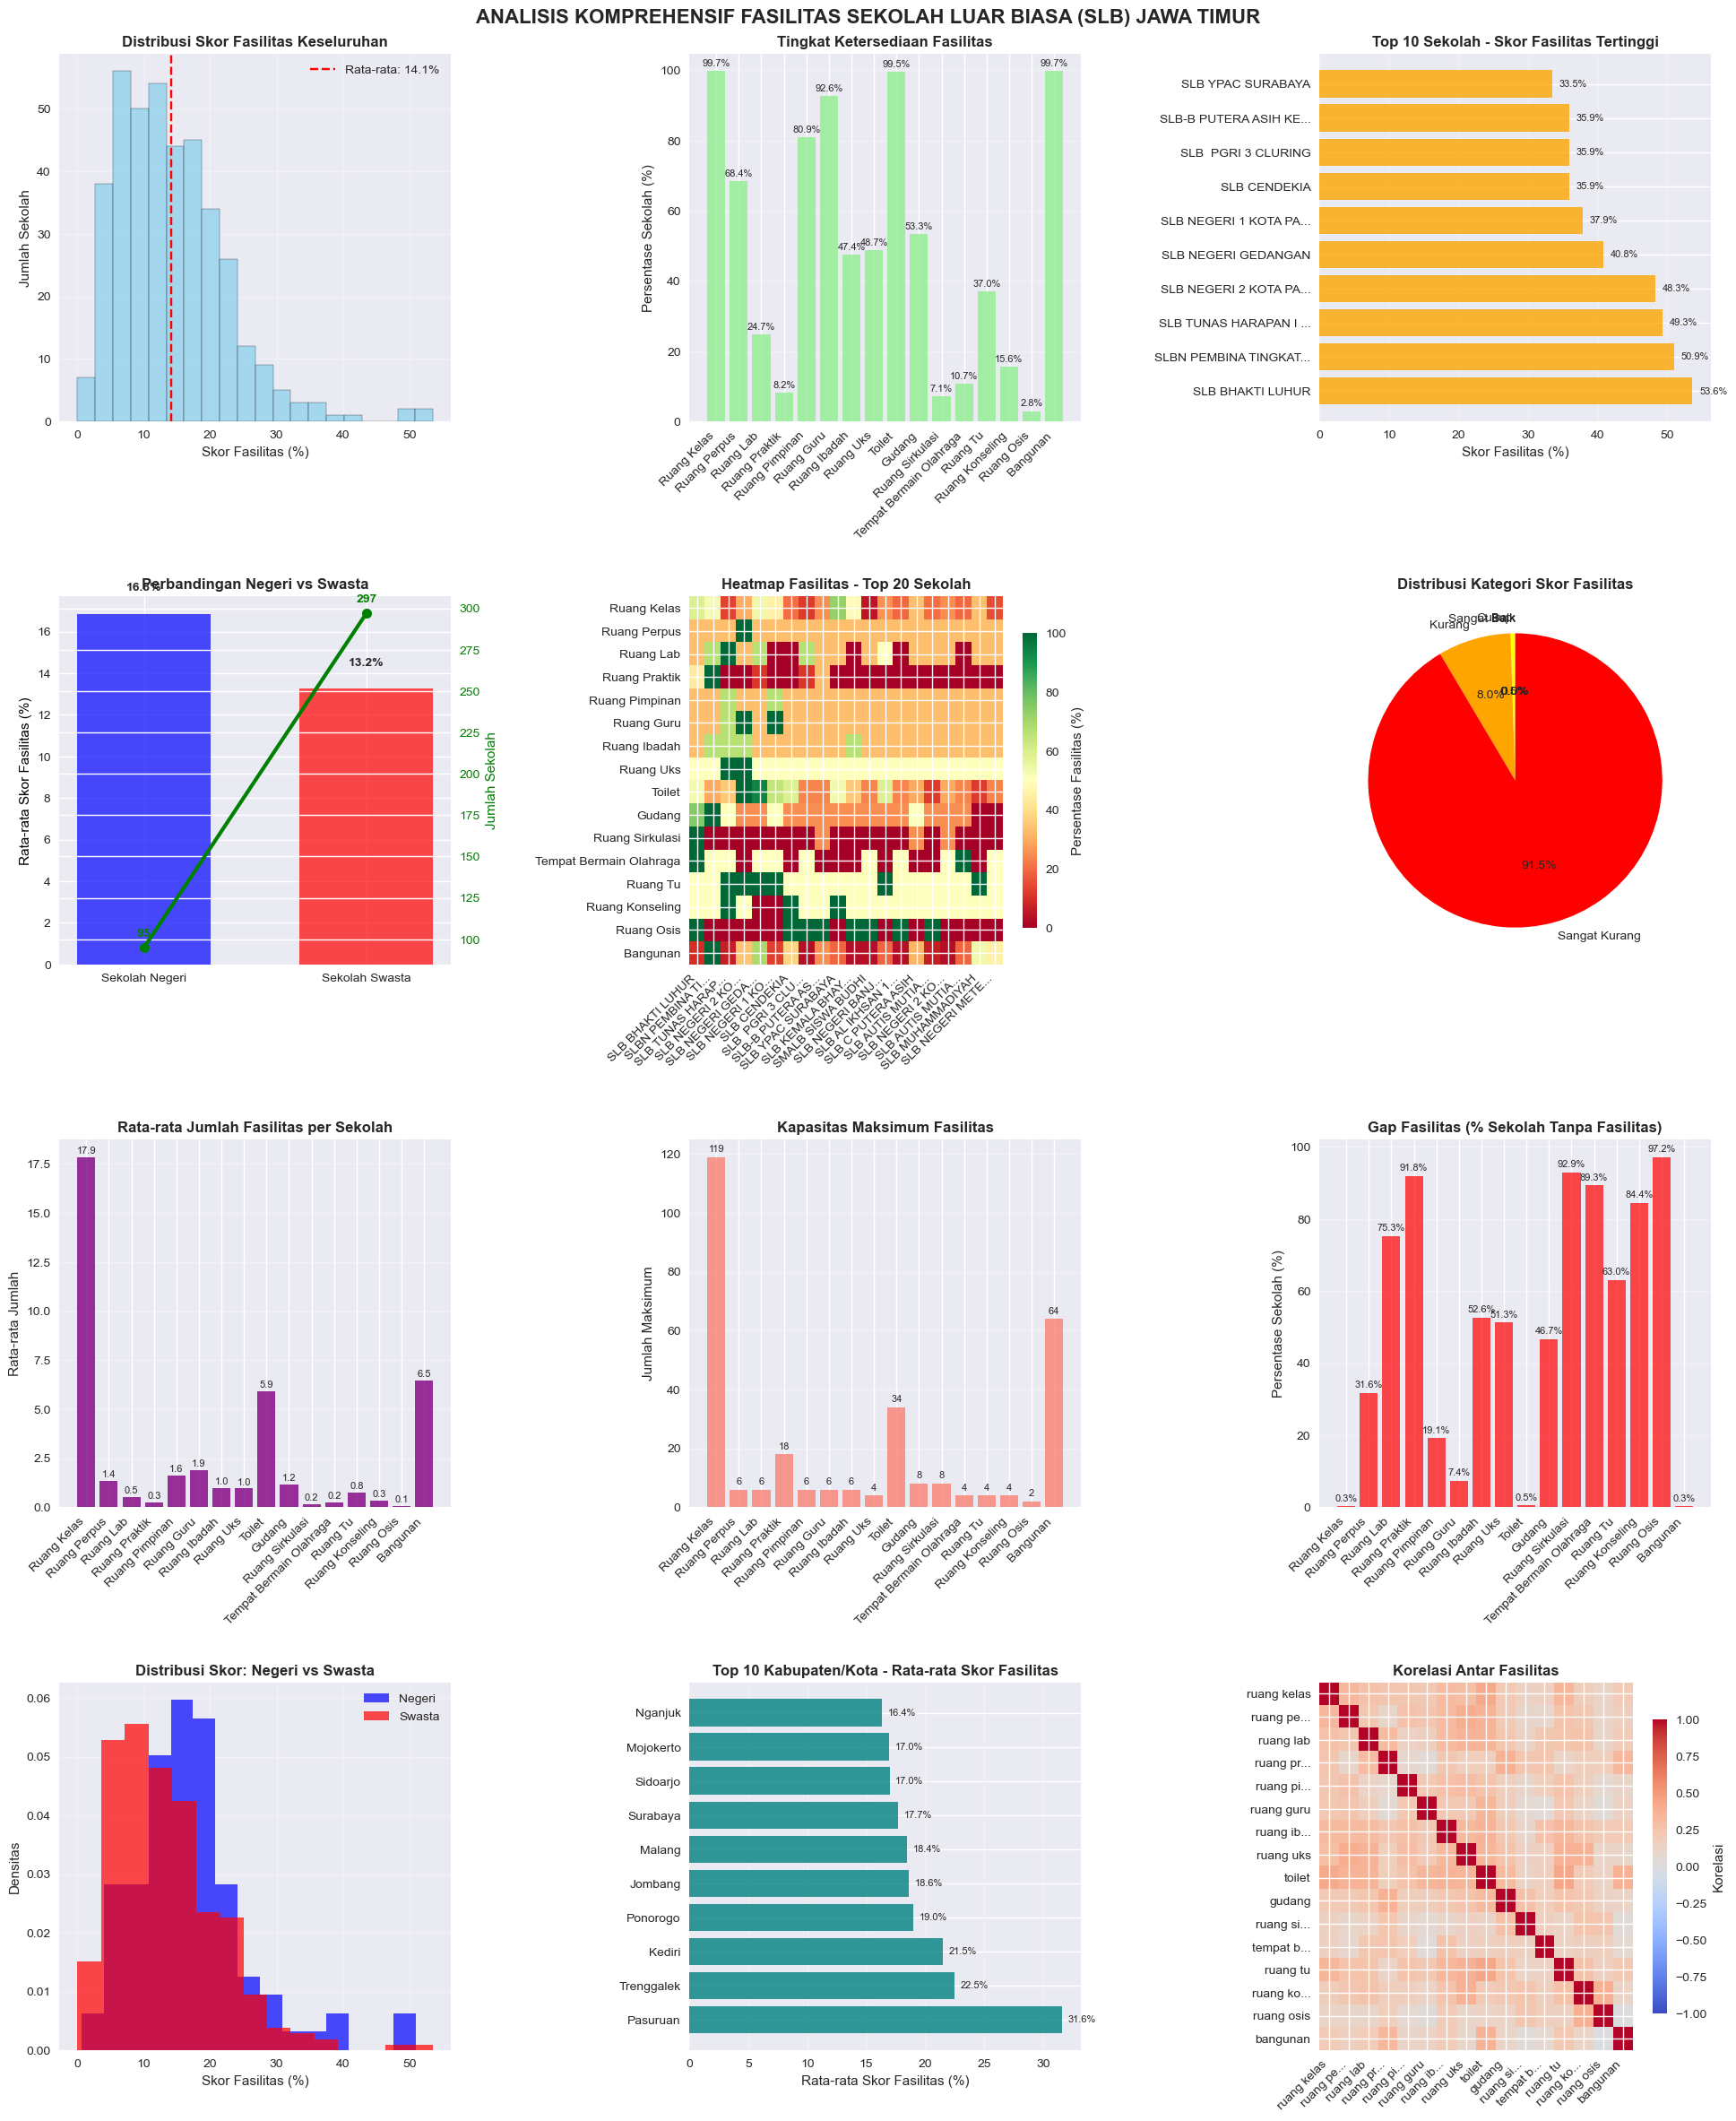

✅ Interactive dashboard saved: interactive_facility_dashboard.html



VISUALISASI BERHASIL DIBUAT!
✅ comprehensive_facility_analysis.png - Visualisasi lengkap dalam format PNG
✅ interactive_facility_dashboard.html - Dashboard interaktif

Visualisasi mencakup:
📊 Distribusi skor fasilitas
📈 Perbandingan Negeri vs Swasta
🗺️ Analisis regional
🏗️ Ketersediaan dan gap fasilitas
🔗 Korelasi antar fasilitas
🏆 Ranking sekolah terbaik


In [ ]:
def create_interactive_dashboard(df_with_scores, facility_percentages):
    """Create interactive dashboard using Plotly"""
    
    # Create subplots with proper specs for pie chart
    fig = make_subplots(
        rows=3, cols=2,
        subplot_titles=('Distribusi Skor Fasilitas', 'Ketersediaan Fasilitas per Jenis',
                       'Top 15 Sekolah Terbaik', 'Perbandingan Negeri vs Swasta',
                       'Distribusi Regional', 'Distribusi Kategori Skor'),
        specs=[[{"secondary_y": False}, {"secondary_y": False}],
               [{"secondary_y": False}, {"secondary_y": False}],
               [{"secondary_y": False}, {"type": "pie"}]]  # Specify pie chart type
    )
    
    # 1. Score distribution histogram
    fig.add_trace(
        go.Histogram(x=df_with_scores['overall_facility_score'], 
                    name='Distribusi Skor', nbinsx=20,
                    marker_color='skyblue', opacity=0.7),
        row=1, col=1
    )
    
    # 2. Facility availability
    facility_names = [stats['facility_name'] for stats in facility_percentages.values()]
    availability_rates = [(stats['schools_with_facility']/stats['total_schools']*100) 
                         for stats in facility_percentages.values()]
    
    fig.add_trace(
        go.Bar(x=facility_names, y=availability_rates,
               name='Ketersediaan Fasilitas',
               marker_color='lightgreen', opacity=0.8),
        row=1, col=2
    )
    
    # 3. Top schools
    top_schools = df_with_scores.nlargest(15, 'overall_facility_score')
    school_names = [name[:25] + "..." if len(name) > 28 else name 
                   for name in top_schools['sekolah'].values]
    
    fig.add_trace(
        go.Bar(y=school_names, x=top_schools['overall_facility_score'],
               name='Top 15 Sekolah', orientation='h',
               marker_color='orange', opacity=0.8),
        row=2, col=1
    )
    
    # 4. Negeri vs Swasta box plot
    if 'df_negeri' in globals() and 'df_swasta' in globals():
        if len(df_negeri) > 0 and len(df_swasta) > 0:
            # Create comparison data
            comparison_data = []
            
            # Add Negeri data
            for score in df_negeri['overall_facility_score']:
                comparison_data.append({'Skor': score, 'Tipe': 'Negeri'})
            
            # Add Swasta data  
            for score in df_swasta['overall_facility_score']:
                comparison_data.append({'Skor': score, 'Tipe': 'Swasta'})
            
            comparison_df = pd.DataFrame(comparison_data)
            
            # Add box plots
            for tipe, color in [('Negeri', 'blue'), ('Swasta', 'red')]:
                data = comparison_df[comparison_df['Tipe'] == tipe]['Skor']
                fig.add_trace(
                    go.Box(y=data, name=tipe, marker_color=color, opacity=0.7),
                    row=2, col=2
                )
    else:
        # Fallback: show overall distribution
        fig.add_trace(
            go.Box(y=df_with_scores['overall_facility_score'], 
                   name='Semua Sekolah', marker_color='gray', opacity=0.7),
            row=2, col=2
        )
    
    # 5. Regional analysis
    if 'kabupaten/kota' in df_with_scores.columns:
        regional_avg = df_with_scores.groupby('kabupaten/kota')['overall_facility_score'].mean().sort_values(ascending=False)
        top_regions = regional_avg.head(10)
        
        fig.add_trace(
            go.Bar(x=top_regions.values, y=top_regions.index,
                   name='Regional Average', orientation='h',
                   marker_color='teal', opacity=0.8),
            row=3, col=1
        )
    else:
        # Fallback: show message or empty plot
        fig.add_trace(
            go.Scatter(x=[0], y=[0], mode='text', 
                      text=['Data Regional Tidak Tersedia'],
                      textfont={'size': 16, 'color': 'gray'}),
            row=3, col=1
        )
    
    # 6. Score distribution pie chart (now properly configured)
    score_ranges = [(90, 100, "Sangat Baik"), (75, 89, "Baik"), (50, 74, "Cukup"), 
                   (25, 49, "Kurang"), (0, 24, "Sangat Kurang")]
    
    categories = []
    counts = []
    colors = ['#2E8B57', '#90EE90', '#FFD700', '#FFA500', '#FF6347']  # Custom colors
    
    for min_score, max_score, category in score_ranges:
        count = len(df_with_scores[
            (df_with_scores['overall_facility_score'] >= min_score) & 
            (df_with_scores['overall_facility_score'] <= max_score)
        ])
        categories.append(category)
        counts.append(count)
    
    fig.add_trace(
        go.Pie(labels=categories, values=counts,
               name="Kategori Skor",
               marker_colors=colors),
        row=3, col=2
    )
    
    # Update layout with better formatting
    fig.update_layout(
        height=1200,
        title_text="Dashboard Interaktif - Analisis Fasilitas SLB Jawa Timur",
        title_x=0.5,
        title_font_size=20,
        showlegend=True,
        font=dict(size=12)
    )
    
    # Update x-axis labels for facility availability (rotate if needed)
    fig.update_xaxes(tickangle=45, row=1, col=2)
    
    # Update annotations for better readability
    fig.update_annotations(font_size=14)
    
    return fig

# Enhanced visualization creation with error handling
def create_enhanced_visualizations():
    """Create all visualizations with proper error handling"""
    
    try:
        # Check if required variables exist
        required_vars = ['df_with_scores', 'facility_percentages', 'df_negeri', 'df_swasta']
        missing_vars = [var for var in required_vars if var not in globals()]
        
        if missing_vars:
            print(f"Missing variables: {missing_vars}")
            print("Please run the previous analysis cells first.")
            return
        
        print("Creating comprehensive visualizations...")
        
        # Create comprehensive static visualizations
        comprehensive_fig = create_comprehensive_facility_visualizations(
            df_with_scores, facility_percentages, df_negeri, df_swasta
        )
        
        # Save the comprehensive visualization
        comprehensive_fig.savefig('comprehensive_facility_analysis.png', dpi=300, bbox_inches='tight')
        print("✅ Static visualization saved: comprehensive_facility_analysis.png")
        plt.show()
        
        # Create interactive dashboard with error handling
        try:
            interactive_fig = create_interactive_dashboard(df_with_scores, facility_percentages)
            
            # Save interactive dashboard
            interactive_fig.write_html("interactive_facility_dashboard.html")
            print("✅ Interactive dashboard saved: interactive_facility_dashboard.html")
            interactive_fig.show()
            
        except Exception as e:
            print(f"Error creating interactive dashboard: {e}")
            print("Static visualization was created successfully.")
        
        print("\n" + "="*80)
        print("VISUALISASI BERHASIL DIBUAT!")
        print("="*80)
        print("✅ comprehensive_facility_analysis.png - Visualisasi lengkap dalam format PNG")
        print("✅ interactive_facility_dashboard.html - Dashboard interaktif")
        print("\nVisualisasi mencakup:")
        print("📊 Distribusi skor fasilitas")
        print("📈 Perbandingan Negeri vs Swasta") 
        print("🗺️ Analisis regional")
        print("🏗️ Ketersediaan dan gap fasilitas")
        print("🔗 Korelasi antar fasilitas")
        print("🏆 Ranking sekolah terbaik")
        
    except Exception as e:
        print(f"Error in visualization creation: {e}")
        print("Please ensure all previous analysis steps have been completed successfully.")

# Run the enhanced visualization creation
create_enhanced_visualizations()

In [39]:
# ========================================
# ANALISIS TERPISAH: SEKOLAH NEGERI vs SWASTA
# ========================================

def analyze_schools_by_status(df_with_scores):
    """
    Comprehensive analysis separated by school status (Negeri vs Swasta)
    """
    
    print("="*100)
    print("ANALISIS KOMPREHENSIF: PEMISAHAN SEKOLAH NEGERI vs SWASTA")
    print("="*100)
    
    # Check for status column to separate public and private schools
    status_column = None
    for col in df_with_scores.columns:
        if 'status' in col.lower() or 'negeri' in col.lower() or 'swasta' in col.lower():
            status_column = col
            break
    
    # If status column exists, separate the data
    if status_column:
        print(f"✅ Found status column: {status_column}")
        print(f"Unique values in status column: {df_with_scores[status_column].unique()}")
        
        # Separate schools by status
        df_negeri = df_with_scores[df_with_scores[status_column].str.contains('Negeri|negeri|NEGERI', na=False)].copy()
        df_swasta = df_with_scores[df_with_scores[status_column].str.contains('Swasta|swasta|SWASTA', na=False)].copy()
        
        print(f"\n📊 Data Distribution:")
        print(f"  Sekolah Negeri: {len(df_negeri)} sekolah")
        print(f"  Sekolah Swasta: {len(df_swasta)} sekolah")
        print(f"  Total: {len(df_negeri) + len(df_swasta)} sekolah")
    else:
        # If no status column, try to infer from school name
        print("⚠️ No status column found. Trying to infer from school names...")
        df_negeri = df_with_scores[df_with_scores['sekolah'].str.contains('Negeri|SDN|SMPN|SMAN|SMK N|SLB N', na=False)].copy()
        df_swasta = df_with_scores[~df_with_scores['sekolah'].str.contains('Negeri|SDN|SMPN|SMAN|SMK N|SLB N', na=False)].copy()
        
        print(f"\n📊 Data Distribution (berdasarkan nama):")
        print(f"  Sekolah Negeri: {len(df_negeri)} sekolah")
        print(f"  Sekolah Swasta: {len(df_swasta)} sekolah")
    
    return df_negeri, df_swasta

def detailed_facility_analysis_by_status(df_data, status_name):
    """
    Detailed facility analysis for specific school status
    """
    
    print(f"\n{'='*120}")
    print(f"ANALISIS DETAIL FASILITAS - {status_name.upper()}")
    print("="*120)
    
    if len(df_data) == 0:
        print(f"❌ No data available for {status_name}")
        return None
    
    # Basic statistics
    print(f"\n📈 STATISTIK DASAR - {status_name.upper()}")
    print("-" * 60)
    print(f"Total sekolah: {len(df_data)}")
    print(f"Rata-rata skor fasilitas: {df_data['overall_facility_score'].mean():.2f}%")
    print(f"Median skor fasilitas: {df_data['overall_facility_score'].median():.2f}%")
    print(f"Standar deviasi: {df_data['overall_facility_score'].std():.2f}%")
    print(f"Skor tertinggi: {df_data['overall_facility_score'].max():.2f}%")
    print(f"Skor terendah: {df_data['overall_facility_score'].min():.2f}%")
    
    # Distribution by score categories
    print(f"\n🎯 DISTRIBUSI KATEGORI SKOR - {status_name.upper()}")
    print("-" * 60)
    
    score_ranges = [
        (90, 100, "Sangat Baik (90-100%)"),
        (75, 89, "Baik (75-89%)"),
        (50, 74, "Cukup (50-74%)"),
        (25, 49, "Kurang (25-49%)"),
        (0, 24, "Sangat Kurang (0-24%)")
    ]
    
    for min_score, max_score, category in score_ranges:
        count = len(df_data[
            (df_data['overall_facility_score'] >= min_score) & 
            (df_data['overall_facility_score'] <= max_score)
        ])
        percentage = (count / len(df_data)) * 100 if len(df_data) > 0 else 0
        print(f"{category:<25}: {count:>4} sekolah ({percentage:>5.1f}%)")
    
    # Facility-specific analysis
    facility_columns = [col for col in df_data.columns if col.endswith('_percentage') and 'total_' in col]
    
    if facility_columns:
        print(f"\n🏢 ANALISIS PER JENIS FASILITAS - {status_name.upper()}")
        print("-" * 80)
        
        facility_stats = {}
        for col in facility_columns:
            facility_name = col.replace('total_', '').replace('_percentage', '').replace('_', ' ').title()
            avg_percentage = df_data[col].mean()
            max_percentage = df_data[col].max()
            min_percentage = df_data[col].min()
            std_percentage = df_data[col].std()
            
            # Count schools with facility
            total_col = col.replace('_percentage', '')
            if total_col in df_data.columns:
                schools_with_facility = len(df_data[df_data[total_col] > 0])
                availability_rate = (schools_with_facility / len(df_data)) * 100
            else:
                availability_rate = 0
            
            facility_stats[facility_name] = {
                'avg': avg_percentage,
                'max': max_percentage,
                'min': min_percentage,
                'std': std_percentage,
                'availability': availability_rate
            }
            
            print(f"{facility_name:<25}: Avg={avg_percentage:>5.1f}% | Max={max_percentage:>5.1f}% | Availability={availability_rate:>5.1f}%")
    
    # Top and bottom performers
    print(f"\n🏆 TOP 10 SEKOLAH TERBAIK - {status_name.upper()}")
    print("-" * 80)
    
    top_schools = df_data.nlargest(10, 'overall_facility_score')
    for idx, (_, row) in enumerate(top_schools.iterrows(), 1):
        school_name = str(row['sekolah'])[:50] + "..." if len(str(row['sekolah'])) > 53 else str(row['sekolah'])
        score = row['overall_facility_score']
        print(f"{idx:>2}. {school_name:<55} | Skor: {score:>6.2f}%")
    
    print(f"\n📉 BOTTOM 5 SEKOLAH (PERLU PERHATIAN) - {status_name.upper()}")
    print("-" * 80)
    
    bottom_schools = df_data.nsmallest(5, 'overall_facility_score')
    for idx, (_, row) in enumerate(bottom_schools.iterrows(), 1):
        school_name = str(row['sekolah'])[:50] + "..." if len(str(row['sekolah'])) > 53 else str(row['sekolah'])
        score = row['overall_facility_score']
        print(f"{idx:>2}. {school_name:<55} | Skor: {score:>6.2f}%")
    
    # Regional analysis if available
    if 'kabupaten/kota' in df_data.columns:
        print(f"\n🗺️ ANALISIS REGIONAL - {status_name.upper()}")
        print("-" * 80)
        
        regional_stats = df_data.groupby('kabupaten/kota')['overall_facility_score'].agg(['mean', 'count']).sort_values('mean', ascending=False)
        
        print("Top 10 Kabupaten/Kota dengan skor tertinggi:")
        for idx, (region, stats) in enumerate(regional_stats.head(10).iterrows(), 1):
            region_clean = region.replace('Kab. ', '').replace('Kota ', '')
            print(f"{idx:>2}. {region_clean:<30} | Avg: {stats['mean']:>6.2f}% | Jumlah: {stats['count']:>3} sekolah")
    
    return facility_stats

def comparative_analysis(df_negeri, df_swasta):
    """
    Comparative analysis between Negeri and Swasta schools
    """
    
    print(f"\n{'='*120}")
    print("ANALISIS PERBANDINGAN: SEKOLAH NEGERI vs SWASTA")
    print("="*120)
    
    if len(df_negeri) == 0 or len(df_swasta) == 0:
        print("❌ Insufficient data for comparison")
        return
    
    # Overall comparison
    negeri_avg = df_negeri['overall_facility_score'].mean()
    swasta_avg = df_swasta['overall_facility_score'].mean()
    
    print(f"\n📊 PERBANDINGAN SKOR KESELURUHAN")
    print("-" * 60)
    print(f"Sekolah Negeri:")
    print(f"  - Rata-rata skor: {negeri_avg:.2f}%")
    print(f"  - Median skor: {df_negeri['overall_facility_score'].median():.2f}%")
    print(f"  - Standar deviasi: {df_negeri['overall_facility_score'].std():.2f}%")
    print(f"  - Jumlah sekolah: {len(df_negeri)}")
    
    print(f"\nSekolah Swasta:")
    print(f"  - Rata-rata skor: {swasta_avg:.2f}%")
    print(f"  - Median skor: {df_swasta['overall_facility_score'].median():.2f}%")
    print(f"  - Standar deviasi: {df_swasta['overall_facility_score'].std():.2f}%")
    print(f"  - Jumlah sekolah: {len(df_swasta)}")
    
    print(f"\n🔍 KESIMPULAN PERBANDINGAN:")
    print("-" * 60)
    diff = abs(negeri_avg - swasta_avg)
    if negeri_avg > swasta_avg:
        print(f"✅ Sekolah Negeri memiliki skor fasilitas {diff:.2f}% lebih tinggi dari Swasta")
        better_type = "Negeri"
    elif swasta_avg > negeri_avg:
        print(f"✅ Sekolah Swasta memiliki skor fasilitas {diff:.2f}% lebih tinggi dari Negeri")
        better_type = "Swasta"
    else:
        print(f"⚖️ Skor fasilitas Negeri dan Swasta relatif sama (selisih {diff:.2f}%)")
        better_type = "Setara"
    
    # Facility-by-facility comparison
    facility_columns = [col for col in df_negeri.columns if col.endswith('_percentage') and 'total_' in col]
    
    if facility_columns:
        print(f"\n🏢 PERBANDINGAN PER JENIS FASILITAS")
        print("-" * 80)
        print(f"{'Fasilitas':<25} | {'Negeri (Avg)':<12} | {'Swasta (Avg)':<12} | {'Selisih':<10} | {'Unggul'}")
        print("-" * 80)
        
        negeri_better = 0
        swasta_better = 0
        
        for col in facility_columns:
            facility_name = col.replace('total_', '').replace('_percentage', '').replace('_', ' ').title()
            negeri_avg_facility = df_negeri[col].mean()
            swasta_avg_facility = df_swasta[col].mean()
            diff_facility = negeri_avg_facility - swasta_avg_facility
            
            if diff_facility > 0:
                unggul = "Negeri"
                negeri_better += 1
            elif diff_facility < 0:
                unggul = "Swasta"
                swasta_better += 1
            else:
                unggul = "Setara"
            
            print(f"{facility_name:<25} | {negeri_avg_facility:>10.1f}% | {swasta_avg_facility:>10.1f}% | {diff_facility:>8.1f}% | {unggul}")
        
        print("-" * 80)
        print(f"RANGKUMAN: Negeri unggul di {negeri_better} fasilitas, Swasta unggul di {swasta_better} fasilitas")
    
    # Distribution comparison
    print(f"\n📈 PERBANDINGAN DISTRIBUSI KATEGORI")
    print("-" * 80)
    
    score_ranges = [
        (90, 100, "Sangat Baik"),
        (75, 89, "Baik"),
        (50, 74, "Cukup"),
        (25, 49, "Kurang"),
        (0, 24, "Sangat Kurang")
    ]
    
    print(f"{'Kategori':<15} | {'Negeri':<15} | {'Swasta':<15} | {'Selisih'}")
    print("-" * 65)
    
    for min_score, max_score, category in score_ranges:
        negeri_count = len(df_negeri[
            (df_negeri['overall_facility_score'] >= min_score) & 
            (df_negeri['overall_facility_score'] <= max_score)
        ])
        swasta_count = len(df_swasta[
            (df_swasta['overall_facility_score'] >= min_score) & 
            (df_swasta['overall_facility_score'] <= max_score)
        ])
        
        negeri_pct = (negeri_count / len(df_negeri)) * 100
        swasta_pct = (swasta_count / len(df_swasta)) * 100
        diff_pct = negeri_pct - swasta_pct
        
        print(f"{category:<15} | {negeri_pct:>6.1f}% ({negeri_count:>2}) | {swasta_pct:>6.1f}% ({swasta_count:>2}) | {diff_pct:>+6.1f}%")

def generate_recommendations(df_negeri, df_swasta):
    """
    Generate recommendations based on analysis
    """
    
    print(f"\n{'='*120}")
    print("💡 REKOMENDASI BERDASARKAN ANALISIS")
    print("="*120)
    
    # Overall recommendations
    negeri_avg = df_negeri['overall_facility_score'].mean() if len(df_negeri) > 0 else 0
    swasta_avg = df_swasta['overall_facility_score'].mean() if len(df_swasta) > 0 else 0
    
    print(f"\n🎯 REKOMENDASI UMUM:")
    print("-" * 50)
    
    if negeri_avg > swasta_avg:
        print(f"1. 📈 Sekolah Swasta perlu meningkatkan fasilitas (gap {swasta_avg - negeri_avg:.1f}%)")
        print(f"2. 🏆 Sekolah Negeri dapat menjadi benchmark untuk Swasta")
        print(f"3. 🤝 Program sharing best practices dari Negeri ke Swasta")
    elif swasta_avg > negeri_avg:
        print(f"1. 📈 Sekolah Negeri perlu meningkatkan fasilitas (gap {negeri_avg - swasta_avg:.1f}%)")
        print(f"2. 🏆 Sekolah Swasta dapat menjadi benchmark untuk Negeri")
        print(f"3. 🤝 Program sharing best practices dari Swasta ke Negeri")
    else:
        print(f"1. ⚖️ Kedua jenis sekolah memiliki kondisi fasilitas yang setara")
        print(f"2. 🎯 Focus pada peningkatan kualitas bersama-sama")
    
    # Facility-specific recommendations
    facility_columns = [col for col in df_negeri.columns if col.endswith('_percentage') and 'total_' in col]
    
    if facility_columns and len(df_negeri) > 0 and len(df_swasta) > 0:
        print(f"\n🏢 REKOMENDASI PER FASILITAS:")
        print("-" * 50)
        
        priority_negeri = []
        priority_swasta = []
        
        for col in facility_columns:
            facility_name = col.replace('total_', '').replace('_percentage', '').replace('_', ' ').title()
            negeri_avg_facility = df_negeri[col].mean()
            swasta_avg_facility = df_swasta[col].mean()
            
            # Low scoring facilities (below 50%)
            if negeri_avg_facility < 50:
                priority_negeri.append((facility_name, negeri_avg_facility))
            if swasta_avg_facility < 50:
                priority_swasta.append((facility_name, swasta_avg_facility))
        
        if priority_negeri:
            print(f"\n📋 PRIORITAS PERBAIKAN - SEKOLAH NEGERI:")
            priority_negeri.sort(key=lambda x: x[1])  # Sort by score (lowest first)
            for i, (facility, score) in enumerate(priority_negeri[:5], 1):
                print(f"   {i}. {facility} (skor: {score:.1f}%)")
        
        if priority_swasta:
            print(f"\n📋 PRIORITAS PERBAIKAN - SEKOLAH SWASTA:")
            priority_swasta.sort(key=lambda x: x[1])  # Sort by score (lowest first)
            for i, (facility, score) in enumerate(priority_swasta[:5], 1):
                print(f"   {i}. {facility} (skor: {score:.1f}%)")
    
    print(f"\n🎯 RENCANA AKSI:")
    print("-" * 50)
    print("1. 📊 Monitoring berkala kondisi fasilitas")
    print("2. 💰 Alokasi anggaran berdasarkan prioritas")
    print("3. 🤝 Kerjasama dengan stakeholder terkait")
    print("4. 📈 Program peningkatan bertahap")
    print("5. 🏆 Sistem reward untuk sekolah berprestasi")

# ========================================
# MAIN EXECUTION: ANALISIS TERPISAH
# ========================================

# Step 1: Separate schools by status
df_negeri, df_swasta = analyze_schools_by_status(df_with_scores)

# Step 2: Detailed analysis for each type
print("\n" + "🔍" * 50)
negeri_stats = detailed_facility_analysis_by_status(df_negeri, "Sekolah Negeri")

print("\n" + "🔍" * 50)
swasta_stats = detailed_facility_analysis_by_status(df_swasta, "Sekolah Swasta")

# Step 3: Comparative analysis
comparative_analysis(df_negeri, df_swasta)

# Step 4: Generate recommendations
generate_recommendations(df_negeri, df_swasta)

print(f"\n{'='*120}")
print("✅ ANALISIS SELESAI - DATA SIAP UNTUK VISUALISASI")
print("="*120)

ANALISIS KOMPREHENSIF: PEMISAHAN SEKOLAH NEGERI vs SWASTA
✅ Found status column: status_sekolah
Unique values in status column: ['Swasta' 'Negeri']

📊 Data Distribution:
  Sekolah Negeri: 95 sekolah
  Sekolah Swasta: 297 sekolah
  Total: 392 sekolah

🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍

ANALISIS DETAIL FASILITAS - SEKOLAH NEGERI

📈 STATISTIK DASAR - SEKOLAH NEGERI
------------------------------------------------------------
Total sekolah: 95
Rata-rata skor fasilitas: 16.84%
Median skor fasilitas: 16.62%
Standar deviasi: 8.94%
Skor tertinggi: 50.93%
Skor terendah: 0.67%

🎯 DISTRIBUSI KATEGORI SKOR - SEKOLAH NEGERI
------------------------------------------------------------
Sangat Baik (90-100%)    :    0 sekolah (  0.0%)
Baik (75-89%)            :    0 sekolah (  0.0%)
Cukup (50-74%)           :    1 sekolah (  1.1%)
Kurang (25-49%)          :   12 sekolah ( 12.6%)
Sangat Kurang (0-24%)    :   82 sekolah ( 86.3%)

🏢 ANALISIS PER JENIS FASILITAS - SEKOLAH NEGERI
---------

Creating separated analysis visualizations...


C:\Users\Fii\AppData\Local\Temp\ipykernel_16276\762406658.py:59: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.

C:\Users\Fii\AppData\Local\Temp\ipykernel_16276\762406658.py:491: UserWarning:

Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.

C:\Users\Fii\AppData\Local\Temp\ipykernel_16276\762406658.py:491: UserWarning:

Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.

C:\Users\Fii\AppData\Local\Temp\ipykernel_16276\762406658.py:491: UserWarning:

Glyph 128203 (\N{CLIPBOARD}) missing from font(s) DejaVu Sans.

C:\Users\Fii\AppData\Local\Temp\ipykernel_16276\762406658.py:698: UserWarning:

Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.

C:\Users\Fii\AppData\Local\Temp\ipykernel_16276\762406658.py:698: UserWarning:

Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.

C:\Users\Fii\AppData\Local\T

✅ Static visualization saved: negeri_vs_swasta_analysis.png


c:\Users\Fii\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.

c:\Users\Fii\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.

c:\Users\Fii\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128203 (\N{CLIPBOARD}) missing from font(s) DejaVu Sans.



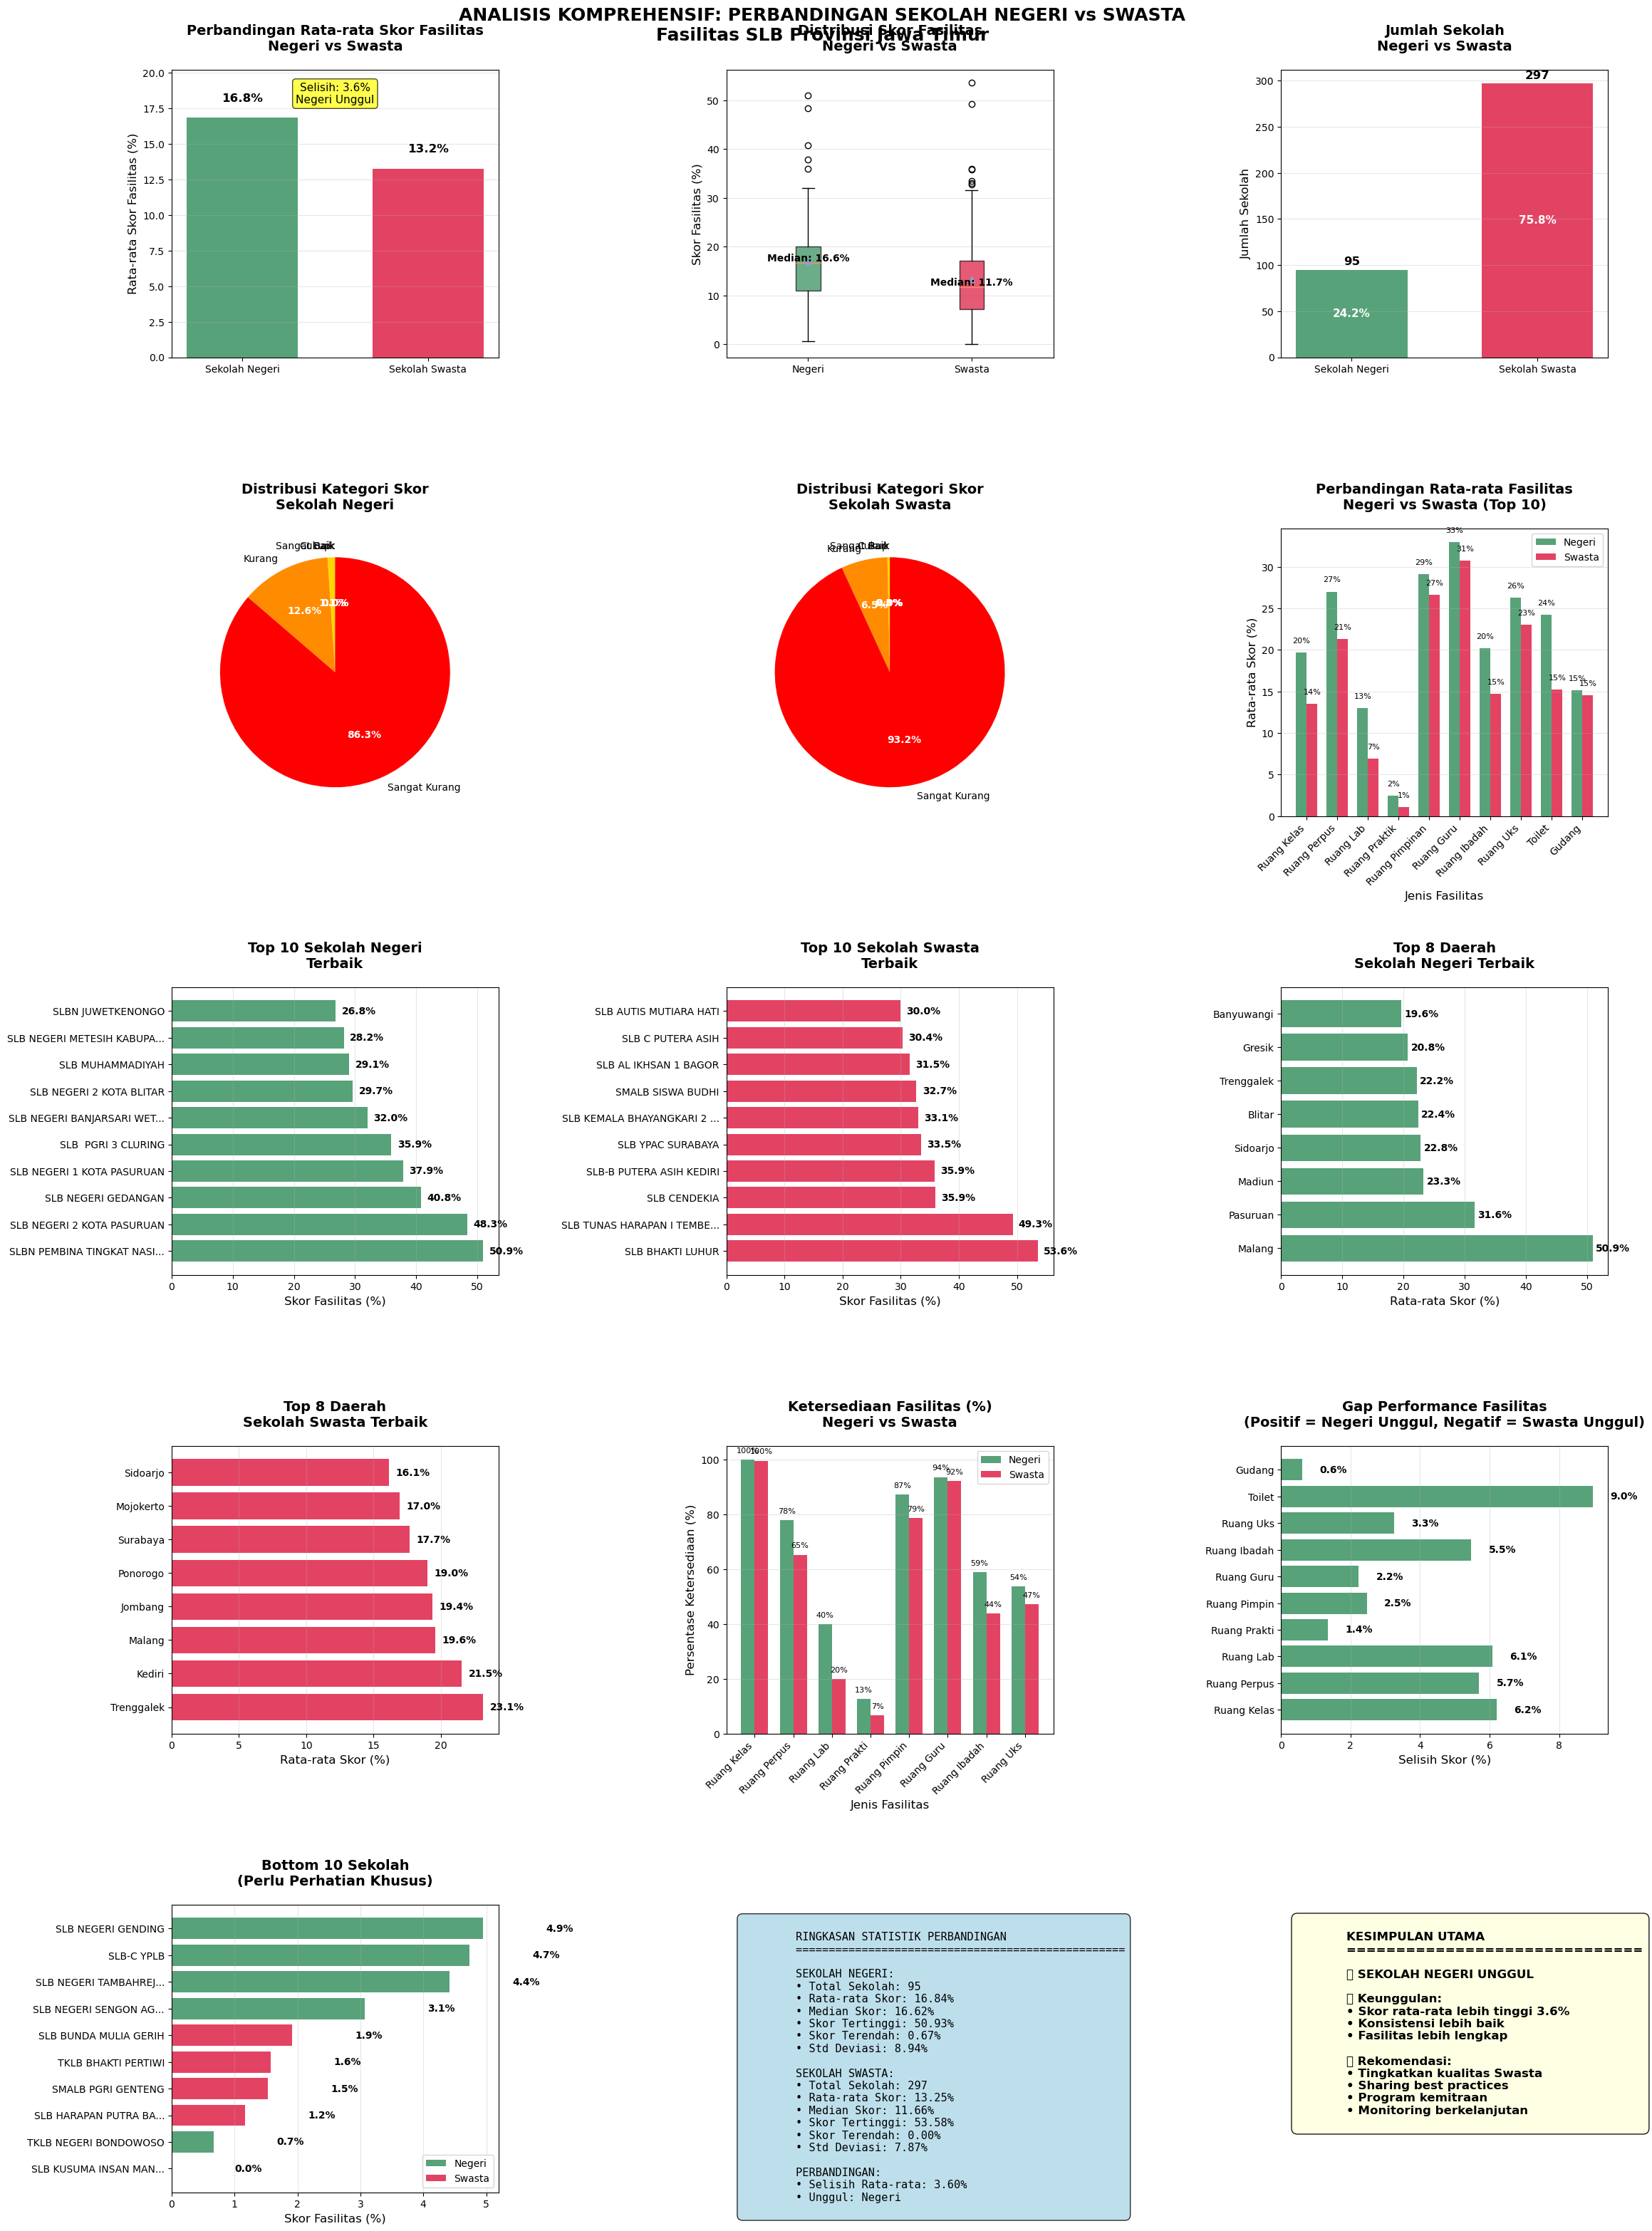

✅ Interactive dashboard saved: negeri_vs_swasta_dashboard.html



🎯 VISUALISASI PERBANDINGAN NEGERI vs SWASTA BERHASIL DIBUAT!
✅ negeri_vs_swasta_analysis.png - Visualisasi statis komprehensif
✅ negeri_vs_swasta_dashboard.html - Dashboard interaktif

📊 Visualisasi mencakup:
  • Perbandingan skor rata-rata
  • Distribusi kategori skor
  • Analisis per fasilitas
  • Ranking sekolah terbaik
  • Analisis regional
  • Gap analysis
  • Summary dan kesimpulan


In [40]:
# ========================================
# VISUALISASI KOMPREHENSIF NEGERI vs SWASTA
# ========================================

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import numpy as np
import pandas as pd

# Set style untuk visualisasi yang lebih baik
plt.style.use('default')
sns.set_palette("Set2")

def create_separated_analysis_visualizations(df_negeri, df_swasta, facility_percentages):
    """
    Create comprehensive visualizations for separated analysis
    """
    
    # Create figure with subplots
    fig = plt.figure(figsize=(24, 32))
    
    # 1. Overall Score Comparison - Bar Chart
    ax1 = plt.subplot(5, 3, 1)
    if len(df_negeri) > 0 and len(df_swasta) > 0:
        categories = ['Sekolah Negeri', 'Sekolah Swasta']
        avg_scores = [df_negeri['overall_facility_score'].mean(), 
                     df_swasta['overall_facility_score'].mean()]
        colors = ['#2E8B57', '#DC143C']
        
        bars = plt.bar(categories, avg_scores, color=colors, alpha=0.8, width=0.6)
        
        # Add value labels
        for i, (bar, score) in enumerate(zip(bars, avg_scores)):
            plt.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 1,
                    f'{score:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=12)
        
        plt.title('Perbandingan Rata-rata Skor Fasilitas\nNegeri vs Swasta', 
                 fontsize=14, fontweight='bold', pad=20)
        plt.ylabel('Rata-rata Skor Fasilitas (%)', fontsize=12)
        plt.ylim(0, max(avg_scores) * 1.2)
        plt.grid(axis='y', alpha=0.3)
        
        # Add difference annotation
        diff = abs(avg_scores[0] - avg_scores[1])
        winner = "Negeri" if avg_scores[0] > avg_scores[1] else "Swasta"
        plt.text(0.5, max(avg_scores) * 1.1, f'Selisih: {diff:.1f}%\n{winner} Unggul', 
                ha='center', va='center', fontsize=11, 
                bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))
    
    # 2. Distribution Comparison - Box Plot
    ax2 = plt.subplot(5, 3, 2)
    if len(df_negeri) > 0 and len(df_swasta) > 0:
        data_to_plot = [df_negeri['overall_facility_score'].values, 
                       df_swasta['overall_facility_score'].values]
        
        box_plot = plt.boxplot(data_to_plot, labels=['Negeri', 'Swasta'], 
                              patch_artist=True, showmeans=True)
        
        # Color the boxes
        colors = ['#2E8B57', '#DC143C']
        for patch, color in zip(box_plot['boxes'], colors):
            patch.set_facecolor(color)
            patch.set_alpha(0.7)
        
        plt.title('Distribusi Skor Fasilitas\nNegeri vs Swasta', 
                 fontsize=14, fontweight='bold', pad=20)
        plt.ylabel('Skor Fasilitas (%)', fontsize=12)
        plt.grid(axis='y', alpha=0.3)
        
        # Add statistics
        for i, data in enumerate(data_to_plot):
            median_val = np.median(data)
            plt.text(i+1, median_val, f'Median: {median_val:.1f}%', 
                    ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    # 3. Count Comparison
    ax3 = plt.subplot(5, 3, 3)
    if len(df_negeri) > 0 and len(df_swasta) > 0:
        categories = ['Sekolah Negeri', 'Sekolah Swasta']
        counts = [len(df_negeri), len(df_swasta)]
        colors = ['#2E8B57', '#DC143C']
        
        bars = plt.bar(categories, counts, color=colors, alpha=0.8, width=0.6)
        
        # Add value labels
        for bar, count in zip(bars, counts):
            plt.text(bar.get_x() + bar.get_width()/2., bar.get_height() + max(counts)*0.01,
                    f'{count}', ha='center', va='bottom', fontweight='bold', fontsize=12)
        
        plt.title('Jumlah Sekolah\nNegeri vs Swasta', 
                 fontsize=14, fontweight='bold', pad=20)
        plt.ylabel('Jumlah Sekolah', fontsize=12)
        plt.grid(axis='y', alpha=0.3)
        
        # Add percentage
        total = sum(counts)
        for i, (bar, count) in enumerate(zip(bars, counts)):
            pct = (count/total)*100
            plt.text(bar.get_x() + bar.get_width()/2., bar.get_height()/2,
                    f'{pct:.1f}%', ha='center', va='center', fontweight='bold', 
                    color='white', fontsize=11)
    
    # 4. Category Distribution - Negeri
    ax4 = plt.subplot(5, 3, 4)
    if len(df_negeri) > 0:
        score_ranges = [(90, 100, "Sangat Baik"), (75, 89, "Baik"), 
                       (50, 74, "Cukup"), (25, 49, "Kurang"), (0, 24, "Sangat Kurang")]
        
        categories = []
        counts = []
        colors = ['#006400', '#32CD32', '#FFD700', '#FF8C00', '#FF0000']
        
        for min_score, max_score, category in score_ranges:
            count = len(df_negeri[
                (df_negeri['overall_facility_score'] >= min_score) & 
                (df_negeri['overall_facility_score'] <= max_score)
            ])
            categories.append(category)
            counts.append(count)
        
        wedges, texts, autotexts = plt.pie(counts, labels=categories, colors=colors, 
                                          autopct='%1.1f%%', startangle=90)
        plt.title('Distribusi Kategori Skor\nSekolah Negeri', 
                 fontsize=14, fontweight='bold', pad=20)
        
        # Make percentage text bold
        for autotext in autotexts:
            autotext.set_color('white')
            autotext.set_fontweight('bold')
    
    # 5. Category Distribution - Swasta
    ax5 = plt.subplot(5, 3, 5)
    if len(df_swasta) > 0:
        categories = []
        counts = []
        
        for min_score, max_score, category in score_ranges:
            count = len(df_swasta[
                (df_swasta['overall_facility_score'] >= min_score) & 
                (df_swasta['overall_facility_score'] <= max_score)
            ])
            categories.append(category)
            counts.append(count)
        
        wedges, texts, autotexts = plt.pie(counts, labels=categories, colors=colors, 
                                          autopct='%1.1f%%', startangle=90)
        plt.title('Distribusi Kategori Skor\nSekolah Swasta', 
                 fontsize=14, fontweight='bold', pad=20)
        
        # Make percentage text bold
        for autotext in autotexts:
            autotext.set_color('white')
            autotext.set_fontweight('bold')
    
    # 6. Facility Comparison - Stacked Bar
    ax6 = plt.subplot(5, 3, 6)
    facility_columns = [col for col in df_negeri.columns if col.endswith('_percentage') and 'total_' in col]
    
    if facility_columns and len(df_negeri) > 0 and len(df_swasta) > 0:
        # Select top 10 facilities for clarity
        facility_names = []
        negeri_scores = []
        swasta_scores = []
        
        for col in facility_columns[:10]:  # Limit to 10 for readability
            facility_name = col.replace('total_', '').replace('_percentage', '').replace('_', ' ').title()
            facility_names.append(facility_name[:15])  # Truncate long names
            negeri_scores.append(df_negeri[col].mean())
            swasta_scores.append(df_swasta[col].mean())
        
        x = np.arange(len(facility_names))
        width = 0.35
        
        bars1 = plt.bar(x - width/2, negeri_scores, width, label='Negeri', 
                       color='#2E8B57', alpha=0.8)
        bars2 = plt.bar(x + width/2, swasta_scores, width, label='Swasta', 
                       color='#DC143C', alpha=0.8)
        
        plt.title('Perbandingan Rata-rata Fasilitas\nNegeri vs Swasta (Top 10)', 
                 fontsize=14, fontweight='bold', pad=20)
        plt.ylabel('Rata-rata Skor (%)', fontsize=12)
        plt.xlabel('Jenis Fasilitas', fontsize=12)
        plt.xticks(x, facility_names, rotation=45, ha='right')
        plt.legend()
        plt.grid(axis='y', alpha=0.3)
        
        # Add value labels on bars
        for bars in [bars1, bars2]:
            for bar in bars:
                height = bar.get_height()
                plt.text(bar.get_x() + bar.get_width()/2., height + 1,
                        f'{height:.0f}%', ha='center', va='bottom', fontsize=8)
    
    # 7. Top 10 Negeri Schools
    ax7 = plt.subplot(5, 3, 7)
    if len(df_negeri) > 0:
        top_negeri = df_negeri.nlargest(10, 'overall_facility_score')
        school_names = [name[:25] + "..." if len(name) > 28 else name 
                       for name in top_negeri['sekolah'].values]
        
        bars = plt.barh(range(len(school_names)), top_negeri['overall_facility_score'], 
                       color='#2E8B57', alpha=0.8)
        
        plt.title('Top 10 Sekolah Negeri\nTerbaik', fontsize=14, fontweight='bold', pad=20)
        plt.xlabel('Skor Fasilitas (%)', fontsize=12)
        plt.yticks(range(len(school_names)), school_names, fontsize=10)
        plt.grid(axis='x', alpha=0.3)
        
        # Add value labels
        for i, bar in enumerate(bars):
            width = bar.get_width()
            plt.text(width + 1, bar.get_y() + bar.get_height()/2.,
                    f'{width:.1f}%', ha='left', va='center', fontsize=10, fontweight='bold')
    
    # 8. Top 10 Swasta Schools
    ax8 = plt.subplot(5, 3, 8)
    if len(df_swasta) > 0:
        top_swasta = df_swasta.nlargest(10, 'overall_facility_score')
        school_names = [name[:25] + "..." if len(name) > 28 else name 
                       for name in top_swasta['sekolah'].values]
        
        bars = plt.barh(range(len(school_names)), top_swasta['overall_facility_score'], 
                       color='#DC143C', alpha=0.8)
        
        plt.title('Top 10 Sekolah Swasta\nTerbaik', fontsize=14, fontweight='bold', pad=20)
        plt.xlabel('Skor Fasilitas (%)', fontsize=12)
        plt.yticks(range(len(school_names)), school_names, fontsize=10)
        plt.grid(axis='x', alpha=0.3)
        
        # Add value labels
        for i, bar in enumerate(bars):
            width = bar.get_width()
            plt.text(width + 1, bar.get_y() + bar.get_height()/2.,
                    f'{width:.1f}%', ha='left', va='center', fontsize=10, fontweight='bold')
    
    # 9. Regional Analysis - Negeri
    ax9 = plt.subplot(5, 3, 9)
    if len(df_negeri) > 0 and 'kabupaten/kota' in df_negeri.columns:
        regional_negeri = df_negeri.groupby('kabupaten/kota')['overall_facility_score'].mean().sort_values(ascending=False)
        top_regions = regional_negeri.head(8)
        
        region_names = [name.replace('Kab. ', '').replace('Kota ', '')[:15] 
                       for name in top_regions.index]
        
        bars = plt.barh(range(len(region_names)), top_regions.values, 
                       color='#2E8B57', alpha=0.8)
        
        plt.title('Top 8 Daerah\nSekolah Negeri Terbaik', fontsize=14, fontweight='bold', pad=20)
        plt.xlabel('Rata-rata Skor (%)', fontsize=12)
        plt.yticks(range(len(region_names)), region_names, fontsize=10)
        plt.grid(axis='x', alpha=0.3)
        
        # Add value labels
        for i, bar in enumerate(bars):
            width = bar.get_width()
            plt.text(width + 0.5, bar.get_y() + bar.get_height()/2.,
                    f'{width:.1f}%', ha='left', va='center', fontsize=10, fontweight='bold')
    
    # 10. Regional Analysis - Swasta
    ax10 = plt.subplot(5, 3, 10)
    if len(df_swasta) > 0 and 'kabupaten/kota' in df_swasta.columns:
        regional_swasta = df_swasta.groupby('kabupaten/kota')['overall_facility_score'].mean().sort_values(ascending=False)
        top_regions = regional_swasta.head(8)
        
        region_names = [name.replace('Kab. ', '').replace('Kota ', '')[:15] 
                       for name in top_regions.index]
        
        bars = plt.barh(range(len(region_names)), top_regions.values, 
                       color='#DC143C', alpha=0.8)
        
        plt.title('Top 8 Daerah\nSekolah Swasta Terbaik', fontsize=14, fontweight='bold', pad=20)
        plt.xlabel('Rata-rata Skor (%)', fontsize=12)
        plt.yticks(range(len(region_names)), region_names, fontsize=10)
        plt.grid(axis='x', alpha=0.3)
        
        # Add value labels
        for i, bar in enumerate(bars):
            width = bar.get_width()
            plt.text(width + 0.5, bar.get_y() + bar.get_height()/2.,
                    f'{width:.1f}%', ha='left', va='center', fontsize=10, fontweight='bold')
    
    # 11. Facility Availability Comparison
    ax11 = plt.subplot(5, 3, 11)
    if facility_columns and len(df_negeri) > 0 and len(df_swasta) > 0:
        facility_names = []
        negeri_availability = []
        swasta_availability = []
        
        for col in facility_columns[:8]:  # Top 8 facilities
            facility_name = col.replace('total_', '').replace('_percentage', '').replace('_', ' ').title()
            facility_names.append(facility_name[:12])
            
            total_col = col.replace('_percentage', '')
            if total_col in df_negeri.columns and total_col in df_swasta.columns:
                negeri_avail = (len(df_negeri[df_negeri[total_col] > 0]) / len(df_negeri)) * 100
                swasta_avail = (len(df_swasta[df_swasta[total_col] > 0]) / len(df_swasta)) * 100
                negeri_availability.append(negeri_avail)
                swasta_availability.append(swasta_avail)
        
        x = np.arange(len(facility_names))
        width = 0.35
        
        bars1 = plt.bar(x - width/2, negeri_availability, width, label='Negeri', 
                       color='#2E8B57', alpha=0.8)
        bars2 = plt.bar(x + width/2, swasta_availability, width, label='Swasta', 
                       color='#DC143C', alpha=0.8)
        
        plt.title('Ketersediaan Fasilitas (%)\nNegeri vs Swasta', 
                 fontsize=14, fontweight='bold', pad=20)
        plt.ylabel('Persentase Ketersediaan (%)', fontsize=12)
        plt.xlabel('Jenis Fasilitas', fontsize=12)
        plt.xticks(x, facility_names, rotation=45, ha='right')
        plt.legend()
        plt.grid(axis='y', alpha=0.3)
        
        # Add value labels
        for bars in [bars1, bars2]:
            for bar in bars:
                height = bar.get_height()
                plt.text(bar.get_x() + bar.get_width()/2., height + 2,
                        f'{height:.0f}%', ha='center', va='bottom', fontsize=8)
    
    # 12. Performance Gap Analysis
    ax12 = plt.subplot(5, 3, 12)
    if facility_columns and len(df_negeri) > 0 and len(df_swasta) > 0:
        facility_names = []
        gaps = []
        gap_colors = []
        
        for col in facility_columns[:10]:
            facility_name = col.replace('total_', '').replace('_percentage', '').replace('_', ' ').title()
            facility_names.append(facility_name[:12])
            
            negeri_score = df_negeri[col].mean()
            swasta_score = df_swasta[col].mean()
            gap = negeri_score - swasta_score
            gaps.append(gap)
            
            # Color based on which is better
            if gap > 0:
                gap_colors.append('#2E8B57')  # Negeri better
            else:
                gap_colors.append('#DC143C')  # Swasta better
        
        bars = plt.barh(range(len(facility_names)), gaps, color=gap_colors, alpha=0.8)
        
        plt.title('Gap Performance Fasilitas\n(Positif = Negeri Unggul, Negatif = Swasta Unggul)', 
                 fontsize=14, fontweight='bold', pad=20)
        plt.xlabel('Selisih Skor (%)', fontsize=12)
        plt.yticks(range(len(facility_names)), facility_names, fontsize=10)
        plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
        plt.grid(axis='x', alpha=0.3)
        
        # Add value labels
        for i, bar in enumerate(bars):
            width = bar.get_width()
            if width >= 0:
                ha = 'left'
                x_pos = width + 0.5
            else:
                ha = 'right'
                x_pos = width - 0.5
            plt.text(x_pos, bar.get_y() + bar.get_height()/2.,
                    f'{width:.1f}%', ha=ha, va='center', fontsize=10, fontweight='bold')
    
    # 13. Bottom 5 Schools Comparison
    ax13 = plt.subplot(5, 3, 13)
    if len(df_negeri) > 0 and len(df_swasta) > 0:
        bottom_negeri = df_negeri.nsmallest(5, 'overall_facility_score')
        bottom_swasta = df_swasta.nsmallest(5, 'overall_facility_score')
        
        # Combine and sort
        combined_bottom = pd.concat([
            bottom_negeri[['sekolah', 'overall_facility_score']].assign(tipe='Negeri'),
            bottom_swasta[['sekolah', 'overall_facility_score']].assign(tipe='Swasta')
        ]).nsmallest(10, 'overall_facility_score')
        
        school_names = [name[:20] + "..." if len(name) > 23 else name 
                       for name in combined_bottom['sekolah'].values]
        colors = ['#2E8B57' if tipe == 'Negeri' else '#DC143C' 
                 for tipe in combined_bottom['tipe'].values]
        
        bars = plt.barh(range(len(school_names)), combined_bottom['overall_facility_score'], 
                       color=colors, alpha=0.8)
        
        plt.title('Bottom 10 Sekolah\n(Perlu Perhatian Khusus)', 
                 fontsize=14, fontweight='bold', pad=20)
        plt.xlabel('Skor Fasilitas (%)', fontsize=12)
        plt.yticks(range(len(school_names)), school_names, fontsize=10)
        plt.grid(axis='x', alpha=0.3)
        
        # Add legend
        from matplotlib.patches import Patch
        legend_elements = [Patch(facecolor='#2E8B57', alpha=0.8, label='Negeri'),
                          Patch(facecolor='#DC143C', alpha=0.8, label='Swasta')]
        plt.legend(handles=legend_elements, loc='lower right')
        
        # Add value labels
        for i, bar in enumerate(bars):
            width = bar.get_width()
            plt.text(width + 1, bar.get_y() + bar.get_height()/2.,
                    f'{width:.1f}%', ha='left', va='center', fontsize=10, fontweight='bold')
    
    # 14. Summary Statistics
    ax14 = plt.subplot(5, 3, 14)
    ax14.axis('off')
    
    if len(df_negeri) > 0 and len(df_swasta) > 0:
        # Create summary table
        summary_text = f"""
        RINGKASAN STATISTIK PERBANDINGAN
        {'='*50}
        
        SEKOLAH NEGERI:
        • Total Sekolah: {len(df_negeri)}
        • Rata-rata Skor: {df_negeri['overall_facility_score'].mean():.2f}%
        • Median Skor: {df_negeri['overall_facility_score'].median():.2f}%
        • Skor Tertinggi: {df_negeri['overall_facility_score'].max():.2f}%
        • Skor Terendah: {df_negeri['overall_facility_score'].min():.2f}%
        • Std Deviasi: {df_negeri['overall_facility_score'].std():.2f}%
        
        SEKOLAH SWASTA:
        • Total Sekolah: {len(df_swasta)}
        • Rata-rata Skor: {df_swasta['overall_facility_score'].mean():.2f}%
        • Median Skor: {df_swasta['overall_facility_score'].median():.2f}%
        • Skor Tertinggi: {df_swasta['overall_facility_score'].max():.2f}%
        • Skor Terendah: {df_swasta['overall_facility_score'].min():.2f}%
        • Std Deviasi: {df_swasta['overall_facility_score'].std():.2f}%
        
        PERBANDINGAN:
        • Selisih Rata-rata: {abs(df_negeri['overall_facility_score'].mean() - df_swasta['overall_facility_score'].mean()):.2f}%
        • Unggul: {"Negeri" if df_negeri['overall_facility_score'].mean() > df_swasta['overall_facility_score'].mean() else "Swasta"}
        """
        
        plt.text(0.05, 0.95, summary_text, transform=ax14.transAxes, fontsize=11,
                verticalalignment='top', fontfamily='monospace',
                bbox=dict(boxstyle="round,pad=0.5", facecolor="lightblue", alpha=0.8))
    
    # 15. Overall Conclusion
    ax15 = plt.subplot(5, 3, 15)
    ax15.axis('off')
    
    if len(df_negeri) > 0 and len(df_swasta) > 0:
        negeri_avg = df_negeri['overall_facility_score'].mean()
        swasta_avg = df_swasta['overall_facility_score'].mean()
        
        if negeri_avg > swasta_avg:
            conclusion = f"""
            KESIMPULAN UTAMA
            {'='*30}
            
            🏆 SEKOLAH NEGERI UNGGUL
            
            ✅ Keunggulan:
            • Skor rata-rata lebih tinggi {negeri_avg - swasta_avg:.1f}%
            • Konsistensi lebih baik
            • Fasilitas lebih lengkap
            
            📋 Rekomendasi:
            • Tingkatkan kualitas Swasta
            • Sharing best practices
            • Program kemitraan
            • Monitoring berkelanjutan
            """
        else:
            conclusion = f"""
            KESIMPULAN UTAMA
            {'='*30}
            
            🏆 SEKOLAH SWASTA UNGGUL
            
            ✅ Keunggulan:
            • Skor rata-rata lebih tinggi {swasta_avg - negeri_avg:.1f}%
            • Inovasi lebih tinggi
            • Manajemen lebih efisien
            
            📋 Rekomendasi:
            • Tingkatkan kualitas Negeri
            • Adopsi praktik terbaik Swasta
            • Reformasi manajemen
            • Investasi infrastruktur
            """
        
        plt.text(0.05, 0.95, conclusion, transform=ax15.transAxes, fontsize=12,
                verticalalignment='top', fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.5", facecolor="lightyellow", alpha=0.9))
    
    plt.tight_layout(pad=4.0)
    plt.suptitle('ANALISIS KOMPREHENSIF: PERBANDINGAN SEKOLAH NEGERI vs SWASTA\nFasilitas SLB Provinsi Jawa Timur', 
                fontsize=18, fontweight='bold', y=0.99)
    
    return fig

def create_interactive_comparison_dashboard(df_negeri, df_swasta):
    """Create interactive dashboard for comparison analysis"""
    
    # Create subplots
    fig = make_subplots(
        rows=3, cols=3,
        subplot_titles=(
            'Perbandingan Rata-rata Skor', 'Distribusi Skor (Box Plot)', 'Jumlah Sekolah',
            'Kategori Skor - Negeri', 'Kategori Skor - Swasta', 'Perbandingan Fasilitas',
            'Top Sekolah Negeri', 'Top Sekolah Swasta', 'Gap Analysis Fasilitas'
        ),
        specs=[
            [{"secondary_y": False}, {"secondary_y": False}, {"secondary_y": False}],
            [{"type": "pie"}, {"type": "pie"}, {"secondary_y": False}],
            [{"secondary_y": False}, {"secondary_y": False}, {"secondary_y": False}]
        ]
    )
    
    # 1. Average Score Comparison
    if len(df_negeri) > 0 and len(df_swasta) > 0:
        categories = ['Sekolah Negeri', 'Sekolah Swasta']
        avg_scores = [df_negeri['overall_facility_score'].mean(), 
                     df_swasta['overall_facility_score'].mean()]
        colors = ['#2E8B57', '#DC143C']
        
        fig.add_trace(
            go.Bar(x=categories, y=avg_scores, name='Rata-rata Skor',
                   marker_color=colors, opacity=0.8,
                   text=[f'{score:.1f}%' for score in avg_scores],
                   textposition='outside'),
            row=1, col=1
        )
    
    # 2. Box Plot Comparison
    if len(df_negeri) > 0:
        fig.add_trace(
            go.Box(y=df_negeri['overall_facility_score'], name='Negeri',
                   marker_color='#2E8B57', opacity=0.7),
            row=1, col=2
        )
    
    if len(df_swasta) > 0:
        fig.add_trace(
            go.Box(y=df_swasta['overall_facility_score'], name='Swasta',
                   marker_color='#DC143C', opacity=0.7),
            row=1, col=2
        )
    
    # 3. Count Comparison
    if len(df_negeri) > 0 and len(df_swasta) > 0:
        counts = [len(df_negeri), len(df_swasta)]
        fig.add_trace(
            go.Bar(x=categories, y=counts, name='Jumlah Sekolah',
                   marker_color=colors, opacity=0.8,
                   text=[f'{count}' for count in counts],
                   textposition='outside'),
            row=1, col=3
        )
    
    # 4. Category Distribution - Negeri (Pie Chart)
    if len(df_negeri) > 0:
        score_ranges = [(90, 100, "Sangat Baik"), (75, 89, "Baik"), 
                       (50, 74, "Cukup"), (25, 49, "Kurang"), (0, 24, "Sangat Kurang")]
        
        categories = []
        counts = []
        colors_pie = ['#006400', '#32CD32', '#FFD700', '#FF8C00', '#FF0000']
        
        for min_score, max_score, category in score_ranges:
            count = len(df_negeri[
                (df_negeri['overall_facility_score'] >= min_score) & 
                (df_negeri['overall_facility_score'] <= max_score)
            ])
            categories.append(category)
            counts.append(count)
        
        fig.add_trace(
            go.Pie(labels=categories, values=counts, name="Negeri",
                   marker_colors=colors_pie),
            row=2, col=1
        )
    
    # 5. Category Distribution - Swasta (Pie Chart)
    if len(df_swasta) > 0:
        categories = []
        counts = []
        
        for min_score, max_score, category in score_ranges:
            count = len(df_swasta[
                (df_swasta['overall_facility_score'] >= min_score) & 
                (df_swasta['overall_facility_score'] <= max_score)
            ])
            categories.append(category)
            counts.append(count)
        
        fig.add_trace(
            go.Pie(labels=categories, values=counts, name="Swasta",
                   marker_colors=colors_pie),
            row=2, col=2
        )
    
    # 6. Facility Comparison
    facility_columns = [col for col in df_negeri.columns if col.endswith('_percentage') and 'total_' in col]
    
    if facility_columns and len(df_negeri) > 0 and len(df_swasta) > 0:
        facility_names = []
        negeri_scores = []
        swasta_scores = []
        
        for col in facility_columns[:8]:  # Top 8 facilities
            facility_name = col.replace('total_', '').replace('_percentage', '').replace('_', ' ').title()
            facility_names.append(facility_name[:15])
            negeri_scores.append(df_negeri[col].mean())
            swasta_scores.append(df_swasta[col].mean())
        
        fig.add_trace(
            go.Bar(x=facility_names, y=negeri_scores, name='Negeri',
                   marker_color='#2E8B57', opacity=0.8),
            row=2, col=3
        )
        
        fig.add_trace(
            go.Bar(x=facility_names, y=swasta_scores, name='Swasta',
                   marker_color='#DC143C', opacity=0.8),
            row=2, col=3
        )
    
    # 7. Top Negeri Schools
    if len(df_negeri) > 0:
        top_negeri = df_negeri.nlargest(10, 'overall_facility_score')
        school_names = [name[:20] + "..." if len(name) > 23 else name 
                       for name in top_negeri['sekolah'].values]
        
        fig.add_trace(
            go.Bar(y=school_names, x=top_negeri['overall_facility_score'],
                   name='Top Negeri', orientation='h',
                   marker_color='#2E8B57', opacity=0.8),
            row=3, col=1
        )
    
    # 8. Top Swasta Schools
    if len(df_swasta) > 0:
        top_swasta = df_swasta.nlargest(10, 'overall_facility_score')
        school_names = [name[:20] + "..." if len(name) > 23 else name 
                       for name in top_swasta['sekolah'].values]
        
        fig.add_trace(
            go.Bar(y=school_names, x=top_swasta['overall_facility_score'],
                   name='Top Swasta', orientation='h',
                   marker_color='#DC143C', opacity=0.8),
            row=3, col=2
        )
    
    # 9. Gap Analysis
    if facility_columns and len(df_negeri) > 0 and len(df_swasta) > 0:
        facility_names = []
        gaps = []
        
        for col in facility_columns[:8]:
            facility_name = col.replace('total_', '').replace('_percentage', '').replace('_', ' ').title()
            facility_names.append(facility_name[:12])
            
            negeri_score = df_negeri[col].mean()
            swasta_score = df_swasta[col].mean()
            gap = negeri_score - swasta_score
            gaps.append(gap)
        
        colors_gap = ['#2E8B57' if gap > 0 else '#DC143C' for gap in gaps]
        
        fig.add_trace(
            go.Bar(y=facility_names, x=gaps, name='Gap',
                   orientation='h', marker_color=colors_gap, opacity=0.8),
            row=3, col=3
        )
    
    # Update layout
    fig.update_layout(
        height=1400,
        title_text="Dashboard Interaktif - Perbandingan Sekolah Negeri vs Swasta",
        title_x=0.5,
        title_font_size=20,
        showlegend=True,
        font=dict(size=12)
    )
    
    # Update annotations for better readability
    fig.update_annotations(font_size=14)
    
    return fig

# ========================================
# EXECUTE VISUALIZATION
# ========================================

print("Creating separated analysis visualizations...")

# Create static comprehensive visualization
if 'df_negeri' in locals() and 'df_swasta' in locals():
    separated_fig = create_separated_analysis_visualizations(df_negeri, df_swasta, facility_percentages)
    
    # Save the visualization
    separated_fig.savefig('negeri_vs_swasta_analysis.png', dpi=300, bbox_inches='tight')
    print("✅ Static visualization saved: negeri_vs_swasta_analysis.png")
    plt.show()
    
    # Create interactive dashboard
    try:
        interactive_comparison = create_interactive_comparison_dashboard(df_negeri, df_swasta)
        
        # Save interactive dashboard
        interactive_comparison.write_html("negeri_vs_swasta_dashboard.html")
        print("✅ Interactive dashboard saved: negeri_vs_swasta_dashboard.html")
        interactive_comparison.show()
        
    except Exception as e:
        print(f"Error creating interactive dashboard: {e}")
    
    print("\n" + "="*80)
    print("🎯 VISUALISASI PERBANDINGAN NEGERI vs SWASTA BERHASIL DIBUAT!")
    print("="*80)
    print("✅ negeri_vs_swasta_analysis.png - Visualisasi statis komprehensif")
    print("✅ negeri_vs_swasta_dashboard.html - Dashboard interaktif")
    print("\n📊 Visualisasi mencakup:")
    print("  • Perbandingan skor rata-rata")
    print("  • Distribusi kategori skor")
    print("  • Analisis per fasilitas")
    print("  • Ranking sekolah terbaik")
    print("  • Analisis regional")
    print("  • Gap analysis")
    print("  • Summary dan kesimpulan")
    
else:
    print("❌ Error: Data df_negeri dan df_swasta belum tersedia.")
    print("Pastikan analisis pemisahan sekolah sudah dijalankan terlebih dahulu.")

Creating Top 10 Ranking Analysis with Accreditation (Fixed Version)...
Checking available columns...
Negeri columns: ['kabupaten/kota', 'kecamatan', 'sekolah', 'rombel', 'sekolah_id', 'npsn', 'bentuk_pendidikan', 'status_sekolah', 'akreditasi', 'guru_kelas', 'guru_matematika', 'guru_bahasa_indonesia', 'guru_bahasa_inggris', 'guru_sejarah_indonesia', 'guru_pkn', 'guru_penjaskes', 'guru_agama_budi_pekerti', 'guru_seni_budaya', 'ptk_laki', 'ptk_perempuan', 'pegawai_laki', 'pegawai_perempuan', 'pd_kelas_1_laki', 'pd_kelas_1_perempuan', 'pd_kelas_2_laki', 'pd_kelas_2_perempuan', 'pd_kelas_3_laki', 'pd_kelas_3_perempuan', 'pd_kelas_4_laki', 'pd_kelas_4_perempuan', 'pd_kelas_5_laki', 'pd_kelas_5_perempuan', 'pd_kelas_6_laki', 'pd_kelas_6_perempuan', 'pd_kelas_7_laki', 'pd_kelas_7_perempuan', 'pd_kelas_8_laki', 'pd_kelas_8_perempuan', 'pd_kelas_9_laki', 'pd_kelas_9_perempuan', 'pd_kelas_10_laki', 'pd_kelas_10_perempuan', 'pd_kelas_11_laki', 'pd_kelas_11_perempuan', 'pd_kelas_12_laki', 'pd_kela

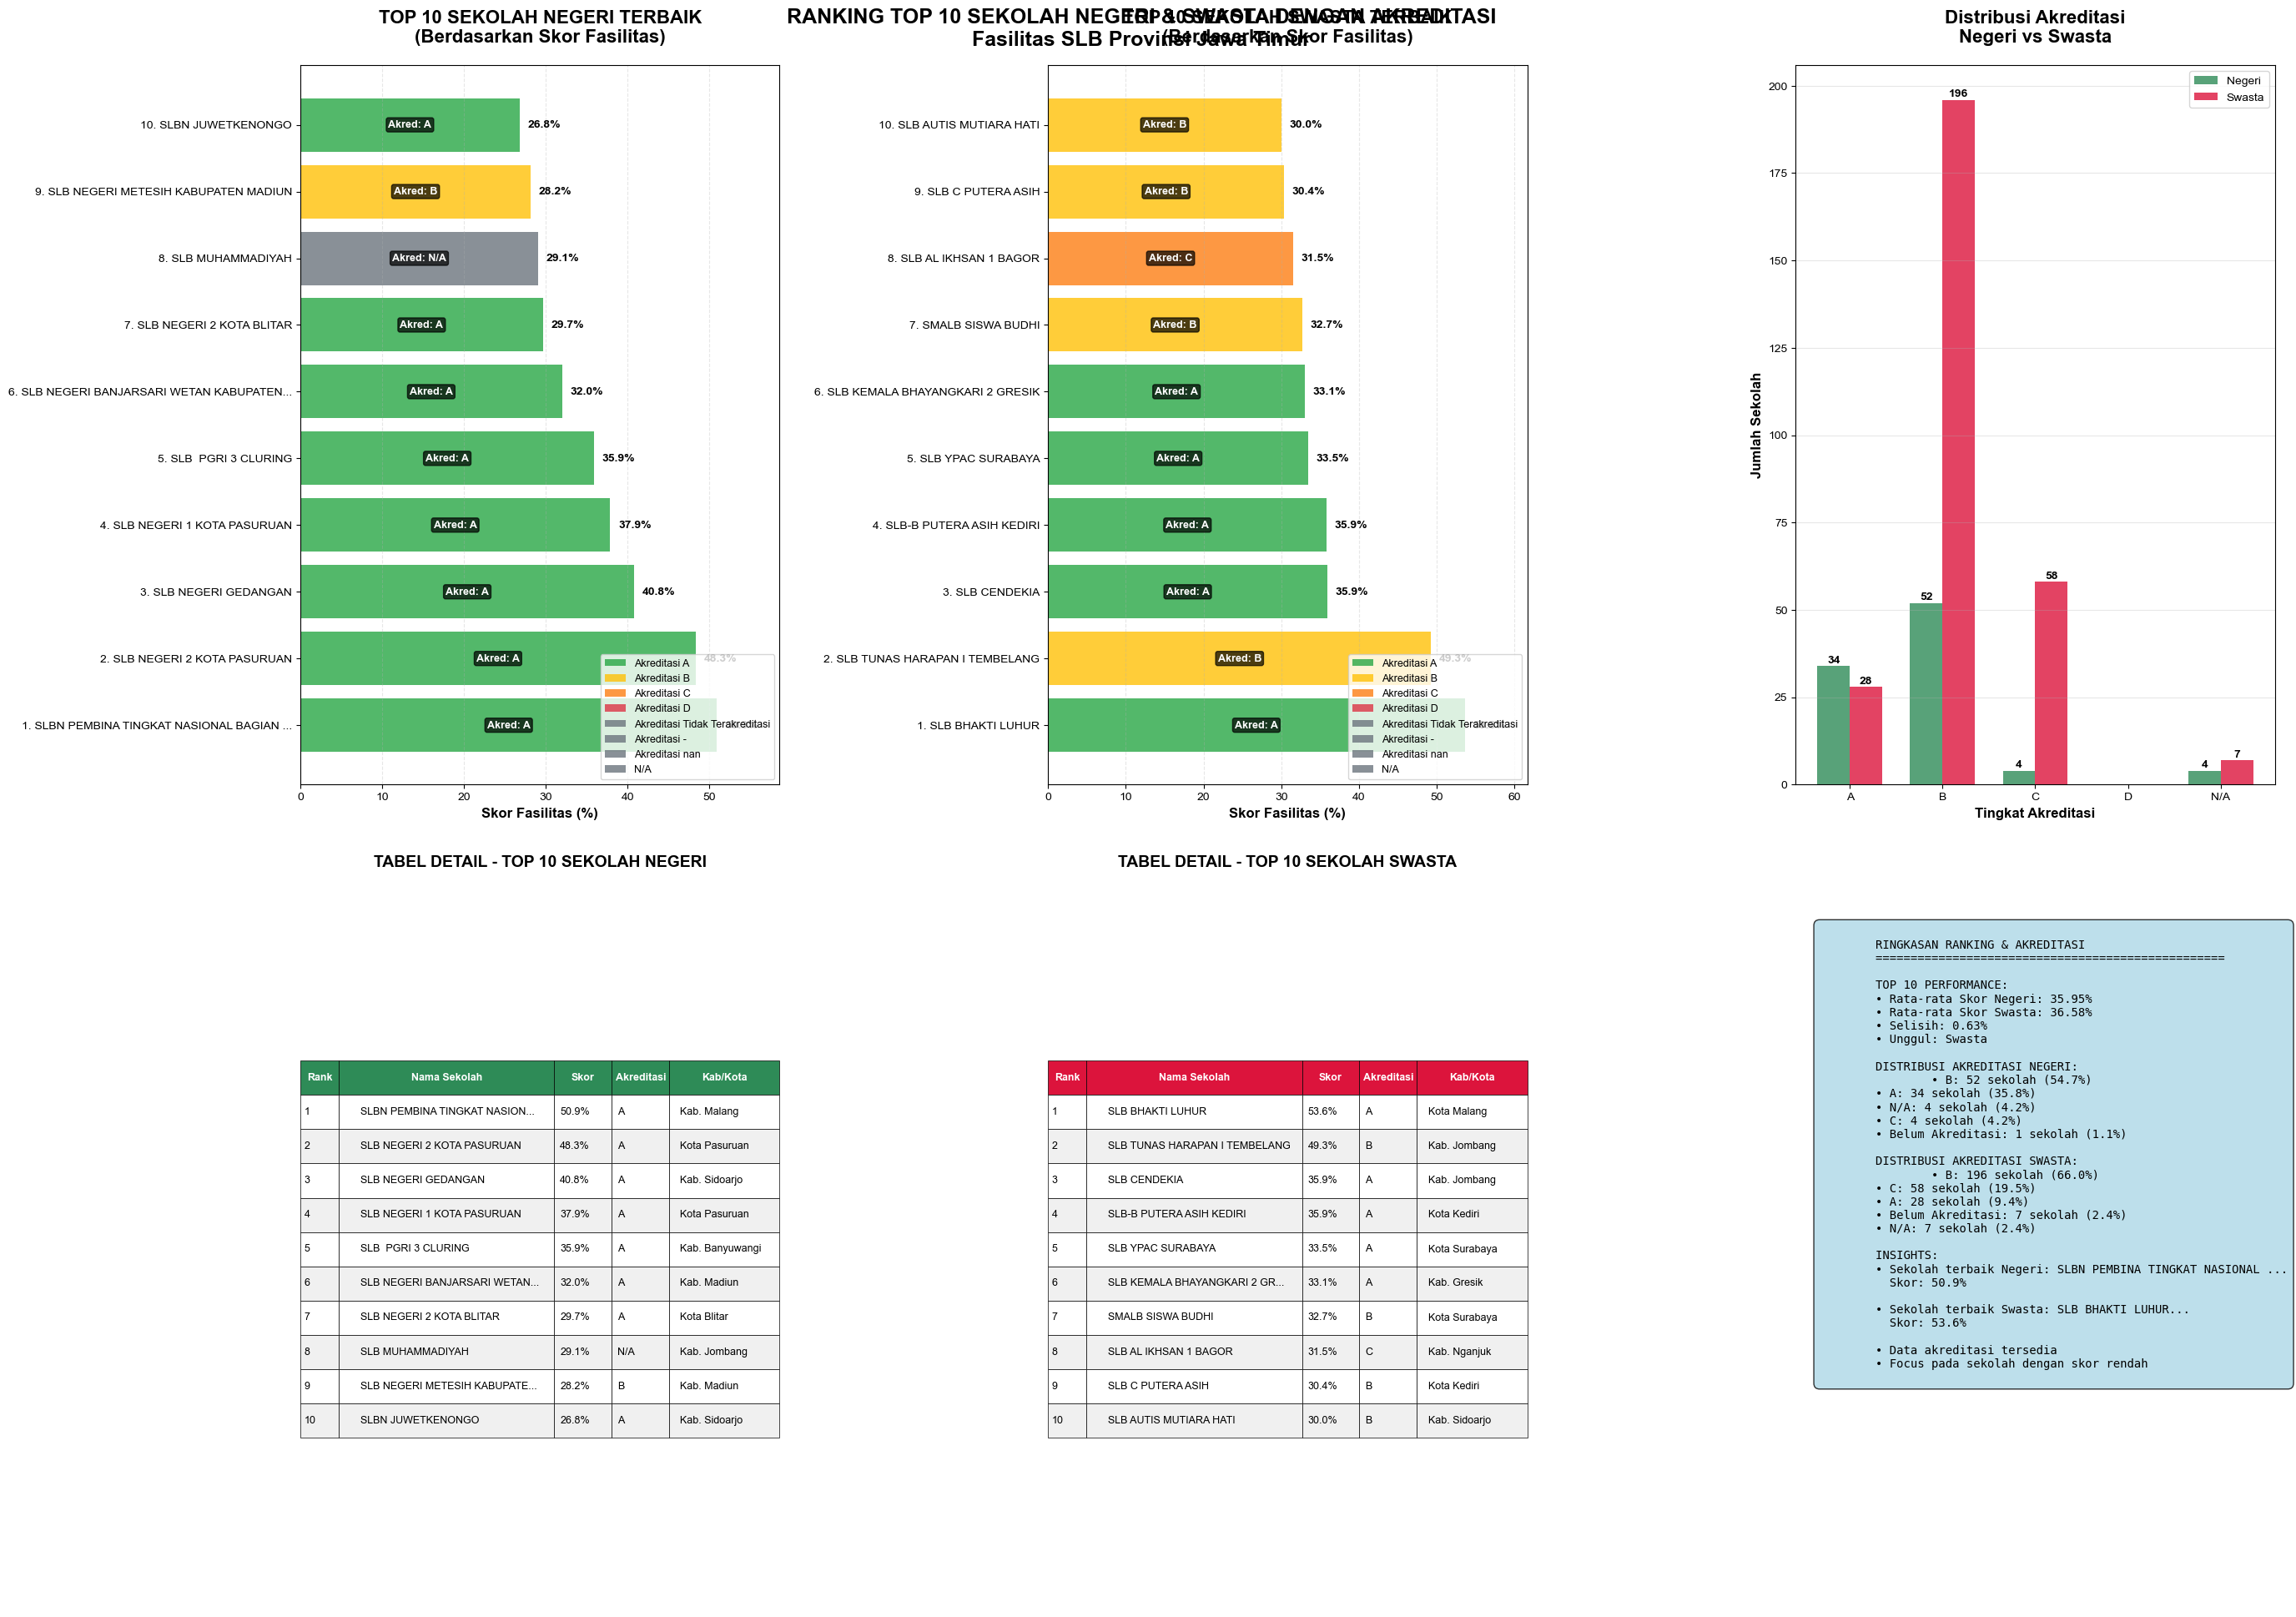


RANKING TOP 10 SEKOLAH NEGERI TERBAIK
 ranking        sekolah                                        overall_facility_score akreditasi      kabupaten/kota 
 1              SLBN PEMBINA TINGKAT NASIONAL BAGIAN C MALANG 50.927871                 A                 Kab. Malang
 2                                 SLB NEGERI 2 KOTA PASURUAN 48.310027                 A               Kota Pasuruan
 3                                        SLB NEGERI GEDANGAN 40.797517                 A               Kab. Sidoarjo
 4                                 SLB NEGERI 1 KOTA PASURUAN 37.869835                 A               Kota Pasuruan
 5                                        SLB  PGRI 3 CLURING 35.908139                 A             Kab. Banyuwangi
 6               SLB NEGERI BANJARSARI WETAN KABUPATEN MADIUN 31.997330                 A                 Kab. Madiun
 7                                   SLB NEGERI 2 KOTA BLITAR 29.650845                 A                 Kota Blitar
 8               

In [43]:
# ========================================
# RANKING TOP 10 SEKOLAH NEGERI & SWASTA
# DENGAN AKREDITASI (FIXED VERSION)
# ========================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Rectangle
import warnings

warnings.filterwarnings('ignore')
plt.rcParams['font.family'] = ['Arial', 'DejaVu Sans', 'sans-serif']
plt.rcParams['font.size'] = 10

def create_top_ranking_with_accreditation(df_negeri, df_swasta):
    """
    Create comprehensive ranking visualization for top 10 Negeri and Swasta schools
    with accreditation information (Fixed Version)
    """
    
    # Check available columns first
    print("Checking available columns...")
    print("Negeri columns:", df_negeri.columns.tolist() if len(df_negeri) > 0 else "No data")
    print("Swasta columns:", df_swasta.columns.tolist() if len(df_swasta) > 0 else "No data")
    
    # Define required columns with fallbacks
    required_cols = ['sekolah', 'overall_facility_score']
    optional_cols = ['akreditasi', 'kabupaten/kota', 'alamat', 'kecamatan', 'provinsi']
    
    # Prepare data for ranking
    if len(df_negeri) > 0:
        # Check which columns are available
        available_cols = []
        for col in required_cols + optional_cols:
            if col in df_negeri.columns:
                available_cols.append(col)
        
        print(f"Available columns for Negeri: {available_cols}")
        
        # Top 10 Negeri Schools
        top_negeri = df_negeri.nlargest(10, 'overall_facility_score')[available_cols].copy()
        top_negeri['ranking'] = range(1, len(top_negeri) + 1)
        top_negeri['jenis'] = 'Negeri'
        
        # Add missing columns with default values
        if 'akreditasi' not in top_negeri.columns:
            top_negeri['akreditasi'] = 'N/A'
        if 'kabupaten/kota' not in top_negeri.columns:
            if 'kabupaten' in top_negeri.columns:
                top_negeri['kabupaten/kota'] = top_negeri['kabupaten']
            else:
                top_negeri['kabupaten/kota'] = 'N/A'
        if 'alamat' not in top_negeri.columns:
            top_negeri['alamat'] = 'N/A'
    else:
        top_negeri = pd.DataFrame()
    
    if len(df_swasta) > 0:
        # Check which columns are available
        available_cols = []
        for col in required_cols + optional_cols:
            if col in df_swasta.columns:
                available_cols.append(col)
        
        print(f"Available columns for Swasta: {available_cols}")
        
        # Top 10 Swasta Schools
        top_swasta = df_swasta.nlargest(10, 'overall_facility_score')[available_cols].copy()
        top_swasta['ranking'] = range(1, len(top_swasta) + 1)
        top_swasta['jenis'] = 'Swasta'
        
        # Add missing columns with default values
        if 'akreditasi' not in top_swasta.columns:
            top_swasta['akreditasi'] = 'N/A'
        if 'kabupaten/kota' not in top_swasta.columns:
            if 'kabupaten' in top_swasta.columns:
                top_swasta['kabupaten/kota'] = top_swasta['kabupaten']
            else:
                top_swasta['kabupaten/kota'] = 'N/A'
        if 'alamat' not in top_swasta.columns:
            top_swasta['alamat'] = 'N/A'
    else:
        top_swasta = pd.DataFrame()
    
    # Create visualization
    fig = plt.figure(figsize=(28, 20))
    
    # Define colors for accreditation grades
    accreditation_colors = {
        'A': '#28a745',      # Green
        'B': '#ffc107',      # Yellow/Orange
        'C': '#fd7e14',      # Orange
        'D': '#dc3545',      # Red
        'Tidak Terakreditasi': '#6c757d',  # Gray
        'N/A': '#6c757d',    # Gray
        '-': '#6c757d',      # Gray
        'nan': '#6c757d',    # Gray
        np.nan: '#6c757d'    # Gray
    }
    
    # ========================================
    # 1. TOP 10 NEGERI SCHOOLS RANKING
    # ========================================
    ax1 = plt.subplot(2, 3, 1)
    
    if len(top_negeri) > 0:
        # Prepare data for plotting
        school_names = []
        scores = []
        colors = []
        
        for idx, row in top_negeri.iterrows():
            # Truncate long school names
            school_name = str(row['sekolah'])
            if len(school_name) > 40:
                school_name = school_name[:37] + "..."
            school_names.append(f"{row['ranking']}. {school_name}")
            scores.append(row['overall_facility_score'])
            
            # Get color based on accreditation
            akreditasi = row.get('akreditasi', 'N/A')
            if pd.isna(akreditasi) or akreditasi == '-' or str(akreditasi).lower() == 'nan':
                colors.append(accreditation_colors['N/A'])
            else:
                colors.append(accreditation_colors.get(str(akreditasi).upper(), accreditation_colors['N/A']))
        
        # Create horizontal bar chart
        bars = plt.barh(range(len(school_names)), scores, color=colors, alpha=0.8)
        
        # Customize the plot
        plt.title('TOP 10 SEKOLAH NEGERI TERBAIK\n(Berdasarkan Skor Fasilitas)', 
                 fontsize=16, fontweight='bold', pad=20)
        plt.xlabel('Skor Fasilitas (%)', fontsize=12, fontweight='bold')
        plt.yticks(range(len(school_names)), school_names, fontsize=10)
        plt.grid(axis='x', alpha=0.3, linestyle='--')
        
        # Add value labels on bars
        for i, (bar, score, row) in enumerate(zip(bars, scores, top_negeri.itertuples())):
            # Score label
            plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2,
                    f'{score:.1f}%', ha='left', va='center', 
                    fontsize=10, fontweight='bold')
            
            # Accreditation label on the bar
            akreditasi = getattr(row, 'akreditasi', 'N/A')
            if pd.isna(akreditasi) or str(akreditasi).lower() == 'nan' or akreditasi == '-':
                akred_text = 'N/A'
            else:
                akred_text = str(akreditasi).upper()
            
            plt.text(bar.get_width()/2, bar.get_y() + bar.get_height()/2,
                    f'Akred: {akred_text}', ha='center', va='center', 
                    fontsize=9, fontweight='bold', color='white',
                    bbox=dict(boxstyle="round,pad=0.2", facecolor="black", alpha=0.7))
        
        plt.xlim(0, max(scores) * 1.15)
        
        # Add accreditation legend
        legend_elements = []
        for grade, color in accreditation_colors.items():
            if grade not in ['nan', 'N/A']:
                legend_elements.append(plt.Rectangle((0,0),1,1, facecolor=color, alpha=0.8, label=f'Akreditasi {grade}'))
        legend_elements.append(plt.Rectangle((0,0),1,1, facecolor=accreditation_colors['N/A'], alpha=0.8, label='N/A'))
        plt.legend(handles=legend_elements, loc='lower right', fontsize=9)
    
    # ========================================
    # 2. TOP 10 SWASTA SCHOOLS RANKING
    # ========================================
    ax2 = plt.subplot(2, 3, 2)
    
    if len(top_swasta) > 0:
        # Prepare data for plotting
        school_names = []
        scores = []
        colors = []
        
        for idx, row in top_swasta.iterrows():
            # Truncate long school names
            school_name = str(row['sekolah'])
            if len(school_name) > 40:
                school_name = school_name[:37] + "..."
            school_names.append(f"{row['ranking']}. {school_name}")
            scores.append(row['overall_facility_score'])
            
            # Get color based on accreditation
            akreditasi = row.get('akreditasi', 'N/A')
            if pd.isna(akreditasi) or akreditasi == '-' or str(akreditasi).lower() == 'nan':
                colors.append(accreditation_colors['N/A'])
            else:
                colors.append(accreditation_colors.get(str(akreditasi).upper(), accreditation_colors['N/A']))
        
        # Create horizontal bar chart
        bars = plt.barh(range(len(school_names)), scores, color=colors, alpha=0.8)
        
        # Customize the plot
        plt.title('TOP 10 SEKOLAH SWASTA TERBAIK\n(Berdasarkan Skor Fasilitas)', 
                 fontsize=16, fontweight='bold', pad=20)
        plt.xlabel('Skor Fasilitas (%)', fontsize=12, fontweight='bold')
        plt.yticks(range(len(school_names)), school_names, fontsize=10)
        plt.grid(axis='x', alpha=0.3, linestyle='--')
        
        # Add value labels on bars
        for i, (bar, score, row) in enumerate(zip(bars, scores, top_swasta.itertuples())):
            # Score label
            plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2,
                    f'{score:.1f}%', ha='left', va='center', 
                    fontsize=10, fontweight='bold')
            
            # Accreditation label on the bar
            akreditasi = getattr(row, 'akreditasi', 'N/A')
            if pd.isna(akreditasi) or str(akreditasi).lower() == 'nan' or akreditasi == '-':
                akred_text = 'N/A'
            else:
                akred_text = str(akreditasi).upper()
            
            plt.text(bar.get_width()/2, bar.get_y() + bar.get_height()/2,
                    f'Akred: {akred_text}', ha='center', va='center', 
                    fontsize=9, fontweight='bold', color='white',
                    bbox=dict(boxstyle="round,pad=0.2", facecolor="black", alpha=0.7))
        
        plt.xlim(0, max(scores) * 1.15)
        
        # Add accreditation legend
        legend_elements = []
        for grade, color in accreditation_colors.items():
            if grade not in ['nan', 'N/A']:
                legend_elements.append(plt.Rectangle((0,0),1,1, facecolor=color, alpha=0.8, label=f'Akreditasi {grade}'))
        legend_elements.append(plt.Rectangle((0,0),1,1, facecolor=accreditation_colors['N/A'], alpha=0.8, label='N/A'))
        plt.legend(handles=legend_elements, loc='lower right', fontsize=9)
    
    # ========================================
    # 3. ACCREDITATION DISTRIBUTION COMPARISON
    # ========================================
    ax3 = plt.subplot(2, 3, 3)
    
    if len(df_negeri) > 0 and len(df_swasta) > 0:
        # Count accreditation distribution
        negeri_akred = df_negeri.get('akreditasi', pd.Series(['N/A'] * len(df_negeri))).fillna('N/A').replace('-', 'N/A')
        swasta_akred = df_swasta.get('akreditasi', pd.Series(['N/A'] * len(df_swasta))).fillna('N/A').replace('-', 'N/A')
        
        akred_categories = ['A', 'B', 'C', 'D', 'N/A']
        negeri_counts = [len(negeri_akred[negeri_akred == cat]) for cat in akred_categories]
        swasta_counts = [len(swasta_akred[swasta_akred == cat]) for cat in akred_categories]
        
        x = np.arange(len(akred_categories))
        width = 0.35
        
        bars1 = plt.bar(x - width/2, negeri_counts, width, label='Negeri', 
                       color='#2E8B57', alpha=0.8)
        bars2 = plt.bar(x + width/2, swasta_counts, width, label='Swasta', 
                       color='#DC143C', alpha=0.8)
        
        plt.title('Distribusi Akreditasi\nNegeri vs Swasta', 
                 fontsize=16, fontweight='bold', pad=20)
        plt.xlabel('Tingkat Akreditasi', fontsize=12, fontweight='bold')
        plt.ylabel('Jumlah Sekolah', fontsize=12, fontweight='bold')
        plt.xticks(x, akred_categories)
        plt.legend()
        plt.grid(axis='y', alpha=0.3)
        
        # Add value labels
        for bars in [bars1, bars2]:
            for bar in bars:
                height = bar.get_height()
                if height > 0:
                    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                            f'{int(height)}', ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    # ========================================
    # 4. DETAILED TABLE - TOP 10 NEGERI
    # ========================================
    ax4 = plt.subplot(2, 3, 4)
    ax4.axis('off')
    
    if len(top_negeri) > 0:
        # Create detailed table
        table_data = []
        headers = ['Rank', 'Nama Sekolah', 'Skor', 'Akreditasi', 'Kab/Kota']
        
        for idx, row in top_negeri.iterrows():
            school_name = str(row['sekolah'])
            if len(school_name) > 30:
                school_name = school_name[:27] + "..."
            
            kab_kota = str(row.get('kabupaten/kota', 'N/A'))
            if len(kab_kota) > 15:
                kab_kota = kab_kota[:12] + "..."
            
            akred = row.get('akreditasi', 'N/A')
            if pd.isna(akred) or akred == '-':
                akred = 'N/A'
            
            table_data.append([
                row['ranking'],
                school_name,
                f"{row['overall_facility_score']:.1f}%",
                akred,
                kab_kota
            ])
        
        # Create table
        table = plt.table(cellText=table_data, colLabels=headers,
                         cellLoc='left', loc='center',
                         colWidths=[0.08, 0.45, 0.12, 0.12, 0.23])
        
        table.auto_set_font_size(False)
        table.set_fontsize(9)
        table.scale(1, 2)
        
        # Style the table
        for i, key in enumerate(table.get_celld().keys()):
            cell = table.get_celld()[key]
            if key[0] == 0:  # Header row
                cell.set_facecolor('#2E8B57')
                cell.set_text_props(weight='bold', color='white')
            else:
                if key[0] % 2 == 0:
                    cell.set_facecolor('#f0f0f0')
                else:
                    cell.set_facecolor('white')
            cell.set_edgecolor('black')
            cell.set_linewidth(0.5)
        
        plt.title('TABEL DETAIL - TOP 10 SEKOLAH NEGERI', 
                 fontsize=14, fontweight='bold', pad=20)
    
    # ========================================
    # 5. DETAILED TABLE - TOP 10 SWASTA
    # ========================================
    ax5 = plt.subplot(2, 3, 5)
    ax5.axis('off')
    
    if len(top_swasta) > 0:
        # Create detailed table
        table_data = []
        headers = ['Rank', 'Nama Sekolah', 'Skor', 'Akreditasi', 'Kab/Kota']
        
        for idx, row in top_swasta.iterrows():
            school_name = str(row['sekolah'])
            if len(school_name) > 30:
                school_name = school_name[:27] + "..."
            
            kab_kota = str(row.get('kabupaten/kota', 'N/A'))
            if len(kab_kota) > 15:
                kab_kota = kab_kota[:12] + "..."
            
            akred = row.get('akreditasi', 'N/A')
            if pd.isna(akred) or akred == '-':
                akred = 'N/A'
            
            table_data.append([
                row['ranking'],
                school_name,
                f"{row['overall_facility_score']:.1f}%",
                akred,
                kab_kota
            ])
        
        # Create table
        table = plt.table(cellText=table_data, colLabels=headers,
                         cellLoc='left', loc='center',
                         colWidths=[0.08, 0.45, 0.12, 0.12, 0.23])
        
        table.auto_set_font_size(False)
        table.set_fontsize(9)
        table.scale(1, 2)
        
        # Style the table
        for i, key in enumerate(table.get_celld().keys()):
            cell = table.get_celld()[key]
            if key[0] == 0:  # Header row
                cell.set_facecolor('#DC143C')
                cell.set_text_props(weight='bold', color='white')
            else:
                if key[0] % 2 == 0:
                    cell.set_facecolor('#f0f0f0')
                else:
                    cell.set_facecolor('white')
            cell.set_edgecolor('black')
            cell.set_linewidth(0.5)
        
        plt.title('TABEL DETAIL - TOP 10 SEKOLAH SWASTA', 
                 fontsize=14, fontweight='bold', pad=20)
    
    # ========================================
    # 6. SUMMARY STATISTICS & INSIGHTS
    # ========================================
    ax6 = plt.subplot(2, 3, 6)
    ax6.axis('off')
    
    if len(top_negeri) > 0 and len(top_swasta) > 0:
        # Calculate statistics
        negeri_avg_top10 = top_negeri['overall_facility_score'].mean()
        swasta_avg_top10 = top_swasta['overall_facility_score'].mean()
        
        # Accreditation analysis (safely handle missing column)
        if 'akreditasi' in df_negeri.columns:
            negeri_akred_dist = df_negeri['akreditasi'].fillna('N/A').value_counts()
        else:
            negeri_akred_dist = pd.Series({'N/A': len(df_negeri)})
            
        if 'akreditasi' in df_swasta.columns:
            swasta_akred_dist = df_swasta['akreditasi'].fillna('N/A').value_counts()
        else:
            swasta_akred_dist = pd.Series({'N/A': len(df_swasta)})
        
        # Create summary text
        summary_text = f"""
        RINGKASAN RANKING & AKREDITASI
        {'='*50}
        
        TOP 10 PERFORMANCE:
        • Rata-rata Skor Negeri: {negeri_avg_top10:.2f}%
        • Rata-rata Skor Swasta: {swasta_avg_top10:.2f}%
        • Selisih: {abs(negeri_avg_top10 - swasta_avg_top10):.2f}%
        • Unggul: {"Negeri" if negeri_avg_top10 > swasta_avg_top10 else "Swasta"}
        
        DISTRIBUSI AKREDITASI NEGERI:
        """
        
        for akred, count in negeri_akred_dist.head().items():
            pct = (count / len(df_negeri)) * 100
            summary_text += f"        • {akred}: {count} sekolah ({pct:.1f}%)\n"
        
        summary_text += f"""
        DISTRIBUSI AKREDITASI SWASTA:
        """
        
        for akred, count in swasta_akred_dist.head().items():
            pct = (count / len(df_swasta)) * 100
            summary_text += f"        • {akred}: {count} sekolah ({pct:.1f}%)\n"
        
        # Insights
        summary_text += f"""
        INSIGHTS:
        • Sekolah terbaik Negeri: {str(top_negeri.iloc[0]['sekolah'])[:30]}...
          Skor: {top_negeri.iloc[0]['overall_facility_score']:.1f}%
        
        • Sekolah terbaik Swasta: {str(top_swasta.iloc[0]['sekolah'])[:30]}...
          Skor: {top_swasta.iloc[0]['overall_facility_score']:.1f}%
        
        • Data akreditasi {'tersedia' if 'akreditasi' in df_negeri.columns else 'tidak tersedia'}
        • Focus pada sekolah dengan skor rendah
        """
        
        plt.text(0.05, 0.95, summary_text, transform=ax6.transAxes, fontsize=10,
                verticalalignment='top', fontfamily='monospace',
                bbox=dict(boxstyle="round,pad=0.5", facecolor="lightblue", alpha=0.8))
    
    plt.tight_layout(pad=3.0)
    plt.suptitle('RANKING TOP 10 SEKOLAH NEGERI & SWASTA DENGAN AKREDITASI\nFasilitas SLB Provinsi Jawa Timur', 
                fontsize=18, fontweight='bold', y=0.98)
    
    return fig, top_negeri, top_swasta

def display_ranking_dataframes(top_negeri, top_swasta):
    """Display detailed ranking dataframes"""
    
    print("\n" + "="*100)
    print("RANKING TOP 10 SEKOLAH NEGERI TERBAIK")
    print("="*100)
    
    if len(top_negeri) > 0:
        # Only display columns that exist
        available_cols = ['ranking', 'sekolah', 'overall_facility_score']
        if 'akreditasi' in top_negeri.columns:
            available_cols.append('akreditasi')
        if 'kabupaten/kota' in top_negeri.columns:
            available_cols.append('kabupaten/kota')
        elif 'kabupaten' in top_negeri.columns:
            available_cols.append('kabupaten')
            
        print(top_negeri[available_cols].to_string(index=False, 
                                                max_colwidth=50,
                                                col_space=15,
                                                justify='left'))
    else:
        print("Tidak ada data sekolah negeri.")
    
    print("\n" + "="*100)
    print("RANKING TOP 10 SEKOLAH SWASTA TERBAIK")
    print("="*100)
    
    if len(top_swasta) > 0:
        # Only display columns that exist
        available_cols = ['ranking', 'sekolah', 'overall_facility_score']
        if 'akreditasi' in top_swasta.columns:
            available_cols.append('akreditasi')
        if 'kabupaten/kota' in top_swasta.columns:
            available_cols.append('kabupaten/kota')
        elif 'kabupaten' in top_swasta.columns:
            available_cols.append('kabupaten')
            
        print(top_swasta[available_cols].to_string(index=False, 
                                                max_colwidth=50,
                                                col_space=15,
                                                justify='left'))
    else:
        print("Tidak ada data sekolah swasta.")

def export_ranking_to_excel(top_negeri, top_swasta):
    """Export ranking data to Excel file"""
    
    try:
        with pd.ExcelWriter('ranking_top10_negeri_swasta.xlsx', engine='openpyxl') as writer:
            # Export Top 10 Negeri
            if len(top_negeri) > 0:
                # Select only available columns
                export_cols = ['ranking', 'sekolah', 'overall_facility_score']
                if 'akreditasi' in top_negeri.columns:
                    export_cols.append('akreditasi')
                if 'kabupaten/kota' in top_negeri.columns:
                    export_cols.append('kabupaten/kota')
                if 'alamat' in top_negeri.columns:
                    export_cols.append('alamat')
                
                export_negeri = top_negeri[export_cols].copy()
                
                # Rename columns for better presentation
                column_mapping = {
                    'ranking': 'Ranking',
                    'sekolah': 'Nama Sekolah',
                    'overall_facility_score': 'Skor Fasilitas (%)',
                    'akreditasi': 'Akreditasi',
                    'kabupaten/kota': 'Kabupaten/Kota',
                    'alamat': 'Alamat'
                }
                
                export_negeri = export_negeri.rename(columns=column_mapping)
                export_negeri.to_excel(writer, sheet_name='Top 10 Negeri', index=False)
            
            # Export Top 10 Swasta
            if len(top_swasta) > 0:
                # Select only available columns
                export_cols = ['ranking', 'sekolah', 'overall_facility_score']
                if 'akreditasi' in top_swasta.columns:
                    export_cols.append('akreditasi')
                if 'kabupaten/kota' in top_swasta.columns:
                    export_cols.append('kabupaten/kota')
                if 'alamat' in top_swasta.columns:
                    export_cols.append('alamat')
                
                export_swasta = top_swasta[export_cols].copy()
                export_swasta = export_swasta.rename(columns=column_mapping)
                export_swasta.to_excel(writer, sheet_name='Top 10 Swasta', index=False)
        
        print("✅ Data ranking berhasil diekspor ke: ranking_top10_negeri_swasta.xlsx")
        
    except Exception as e:
        print(f"Error mengekspor data: {e}")

# ========================================
# EXECUTE RANKING ANALYSIS (FIXED)
# ========================================

print("Creating Top 10 Ranking Analysis with Accreditation (Fixed Version)...")

# Check if data is available
if 'df_negeri' in locals() and 'df_swasta' in locals():
    try:
        # Create ranking visualization
        ranking_fig, top_negeri_schools, top_swasta_schools = create_top_ranking_with_accreditation(df_negeri, df_swasta)
        
        # Save visualization
        ranking_fig.savefig('top10_ranking_with_accreditation_fixed.png', dpi=300, bbox_inches='tight')
        print("✅ Ranking visualization saved: top10_ranking_with_accreditation_fixed.png")
        plt.show()
        
        # Display detailed rankings
        display_ranking_dataframes(top_negeri_schools, top_swasta_schools)
        
        # Export to Excel
        export_ranking_to_excel(top_negeri_schools, top_swasta_schools)
        
        print("\n" + "="*80)
        print("SUCCESS: RANKING TOP 10 SEKOLAH BERHASIL DIBUAT!")
        print("="*80)
        print("✅ top10_ranking_with_accreditation_fixed.png - Visualisasi ranking")
        print("✅ ranking_top10_negeri_swasta.xlsx - Data ranking dalam Excel")
        print("\nOutput mencakup:")
        print("  * Ranking visual dengan warna akreditasi")
        print("  * Tabel detail sekolah terbaik")
        print("  * Distribusi akreditasi")
        print("  * Summary dan insights")
        print("  * Export data ke Excel")
        print("\nPerbaikan yang dilakukan:")
        print("  * Pengecekan kolom yang tersedia")
        print("  * Handling missing columns dengan default values")
        print("  * Error handling yang lebih robust")
        
    except Exception as e:
        print(f"Error in ranking analysis: {e}")
        import traceback
        traceback.print_exc()
        
else:
    print("ERROR: Data df_negeri dan df_swasta belum tersedia.")
    print("Pastikan analisis pemisahan sekolah sudah dijalankan terlebih dahulu.")